## Librerias ##

In [491]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings('ignore', category=UserWarning)

## Carga de Datos ##

Cargamos todos los archivos con los partidos de las diferentes temporadas y creamos un solo archivo con todas las temporadas.

In [492]:
# Creamos la lista de temporadas
seasons = ['2012', '2023']
print(f' number of seasons: {len(seasons)}')

# Inicializa un DataFrame vacío
nfl_df = pd.DataFrame()

# Itera sobre los archivos y concatena los datos en el DataFrame combinado
for season in seasons:
    # Lee cada archivo CSV en un DataFrame temporal
    url = f'C:/Users/terol/OneDrive/Escritorio/TFG/WebScrapping/data/nfl_df{season}.csv'
    temp_df = pd.read_csv(url)
    
    # Concatena el DataFrame temporal con el DataFrame combinado
    nfl_df = pd.concat([nfl_df, temp_df], ignore_index=True)

# Muestra el DataFrame combinado
print(nfl_df)

nfl_df.to_csv('C:/Users/terol/OneDrive/Escritorio/TFG/WebScrapping/data/nfl_df.csv', index=False)

 number of seasons: 2


       Season  Week Team  Day          Date Unnamed: 3 Unnamed: 4   OT  \
0        2003     1  CRD  Sun   September 7   boxscore          L  NaN   
1        2003     2  CRD  Sun  September 14   boxscore          L  NaN   
2        2003     3  CRD  Sun  September 21   boxscore          W  NaN   
3        2003     4  CRD  Sun  September 28   boxscore          L  NaN   
4        2003     5  CRD  Sun     October 5   boxscore          L  NaN   
...       ...   ...  ...  ...           ...        ...        ...  ...   
11319    2023    13  WAS  Sun    December 3   boxscore          L  NaN   
11320    2023    15  WAS  Sun   December 17   boxscore          L  NaN   
11321    2023    16  WAS  Sun   December 24   boxscore          L  NaN   
11322    2023    17  WAS  Sun   December 31   boxscore          L  NaN   
11323    2023    18  WAS  Sun     January 7   boxscore          L  NaN   

      Unnamed: 6                  Opp  ...  FGA  XPM  XPA  Pnt  Yds.3  3DConv  \
0              @        Detroi

In [493]:
nfl_df = pd.read_csv('C:/Users/terol/OneDrive/Escritorio/TFG/WebScrapping/data/nfl_df.csv')

In [494]:
nfl_df.tail(10)

,Season,Week,Team,Day,Date,Unnamed: 3,Unnamed: 4,OT,Unnamed: 6,Opp,...,FGA,XPM,XPA,Pnt,Yds.3,3DConv,3DAtt,4DConv,4DAtt,ToP
11314,2023,8,WAS,Sun,October 29,boxscore,L,NaN,NaN,Philadelphia Eagles,...,1,4,4,2,96,7,12,0,3,31:29
11315,2023,9,WAS,Sun,November 5,boxscore,W,NaN,@,New England Patriots,...,2,2,2,5,239,9,17,0,0,37:10
11316,2023,10,WAS,Sun,November 12,boxscore,L,NaN,@,Seattle Seahawks,...,2,2,3,5,227,7,15,1,1,29:33
11317,2023,11,WAS,Sun,November 19,boxscore,L,NaN,NaN,New York Giants,...,2,1,2,2,90,5,13,1,1,34:51
11318,2023,12,WAS,Thu,November 23,boxscore,L,NaN,@,Dallas Cowboys,...,1,1,1,3,119,7,15,0,3,36:54
11319,2023,13,WAS,Sun,December 3,boxscore,L,NaN,NaN,Miami Dolphins,...,1,1,1,5,214,6,14,1,1,27:44
11320,2023,15,WAS,Sun,December 17,boxscore,L,NaN,@,Los Angeles Rams,...,0,2,3,5,203,3,14,3,5,24:07
11321,2023,16,WAS,Sun,December 24,boxscore,L,NaN,@,New York Jets,...,0,4,4,8,294,3,12,1,1,23:44
11322,2023,17,WAS,Sun,December 31,boxscore,L,NaN,NaN,San Francisco 49ers,...,1,1,1,3,156,3,9,0,1,21:47
11323,2023,18,WAS,Sun,January 7,boxscore,L,NaN,NaN,Dallas Cowboys,...,1,1,1,2,50,2,10,3,4,26:05


In [495]:
nfl_df.columns

Index(['Season', 'Week', 'Team', 'Day', 'Date', 'Unnamed: 3', 'Unnamed: 4',
       'OT', 'Unnamed: 6', 'Opp', 'Tm', 'Opp.1', 'Cmp', 'Att', 'Yds', 'TD',
       'Int', 'Sk', 'Yds.1', 'Y/A', 'NY/A', 'Cmp%', 'Rate', 'Att.1', 'Yds.2',
       'Y/A.1', 'TD.1', 'FGM', 'FGA', 'XPM', 'XPA', 'Pnt', 'Yds.3', '3DConv',
       '3DAtt', '4DConv', '4DAtt', 'ToP'],
      dtype='object')

In [496]:
nfl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11324 entries, 0 to 11323
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      11324 non-null  int64  
 1   Week        11324 non-null  int64  
 2   Team        11324 non-null  object 
 3   Day         11324 non-null  object 
 4   Date        11324 non-null  object 
 5   Unnamed: 3  11324 non-null  object 
 6   Unnamed: 4  11324 non-null  object 
 7   OT          686 non-null    object 
 8   Unnamed: 6  5683 non-null   object 
 9   Opp         11324 non-null  object 
 10  Tm          11324 non-null  int64  
 11  Opp.1       11324 non-null  int64  
 12  Cmp         11324 non-null  int64  
 13  Att         11324 non-null  int64  
 14  Yds         11324 non-null  int64  
 15  TD          11324 non-null  int64  
 16  Int         11324 non-null  int64  
 17  Sk          11324 non-null  int64  
 18  Yds.1       11324 non-null  int64  
 19  Y/A         11324 non-nul

## NOMBRE VARIABLES ##

Eliminamos columnas que son irrelevantes para nuestro trabajo.

In [497]:
#Dropping irrelevant columns
nfl_df = nfl_df.drop(['Unnamed: 3','Unnamed: 6', 'Day', 'Opp', 'Week'], axis =1)

Renombramos las variables para que tengan un nombre más adecuado.

In [498]:
column_name = {'Unnamed: 4': 'target', 'Tm': 'points_scored', 'Opp.1': 'points_allowed', 'Cmp': 'pass_completions',
               'Att': 'pass_attempts', 'Yds': 'pass_yards', 'TD': 'pass_touchdowns', 'Int': 'interceptions',
               'Sk': 'sacks', 'Yds.1': 'sacks_yards', 'Y/A': 'pass_yards_per_attempt', 'NY/A': 'net_yards_per_pass_attempt',
               'Cmp%': 'pass_completion_ratio', 'rate': 'passer_rating', 'Att.1': 'rush_attempts', 'Yds.2': 'rush_yards',
               'Y/A.1': 'rush_yards_per_attempt', 'TD.1': 'rush_touchdowns', 'FGM': 'field_goals_made', 'FGA': 'field_goals_attempts',
               'XPM': 'extra_points_made', 'XPA': 'extra_points_attempts', 'Pnt': 'punts', 'Yds.3': 'punt_yards',
               '3DConv': 'third_down_conversions', '3DAtt': 'third_down_attempts', '4DConv': 'fourth_down_conversions',
               '4DAtt': 'fourth_down_attempts', 'ToP': 'time_of_possession'}

nfl_df.rename(columns=column_name, inplace=True)

nfl_df.columns

Index(['Season', 'Team', 'Date', 'target', 'OT', 'points_scored',
       'points_allowed', 'pass_completions', 'pass_attempts', 'pass_yards',
       'pass_touchdowns', 'interceptions', 'sacks', 'sacks_yards',
       'pass_yards_per_attempt', 'net_yards_per_pass_attempt',
       'pass_completion_ratio', 'Rate', 'rush_attempts', 'rush_yards',
       'rush_yards_per_attempt', 'rush_touchdowns', 'field_goals_made',
       'field_goals_attempts', 'extra_points_made', 'extra_points_attempts',
       'punts', 'punt_yards', 'third_down_conversions', 'third_down_attempts',
       'fourth_down_conversions', 'fourth_down_attempts',
       'time_of_possession'],
      dtype='object')

In [499]:
nfl_df.head()

,Season,Team,Date,target,OT,points_scored,points_allowed,pass_completions,pass_attempts,pass_yards,...,field_goals_attempts,extra_points_made,extra_points_attempts,punts,punt_yards,third_down_conversions,third_down_attempts,fourth_down_conversions,fourth_down_attempts,time_of_possession
0,2003,CRD,September 7,L,NaN,24,42,28,46,339,...,1,3,3,4,163,9,15,0,1,34:06
1,2003,CRD,September 14,L,NaN,0,38,25,46,193,...,1,0,0,4,216,10,18,0,1,33:31
2,2003,CRD,September 21,W,NaN,20,13,20,31,273,...,2,2,2,4,204,8,13,0,0,33:06
3,2003,CRD,September 28,L,NaN,13,37,13,21,125,...,0,1,1,6,312,0,8,2,2,17:33
4,2003,CRD,October 5,L,NaN,7,24,14,28,119,...,0,1,1,6,253,3,12,0,1,23:32


## FORMATO VARIABLES ##

Cambiamos el formato de las variables que lo necesiten.

### Variable date

In [500]:
# Unir los valores de las variables 'Season' y 'Date' en la variable 'Date'
nfl_df['Date'] = nfl_df['Date'] + ' ' + nfl_df['Season'].astype(str)

# Convertir la variable 'Date' a formato datetime
nfl_df['Date'] = pd.to_datetime(nfl_df['Date'], format='%B %d %Y')

### Variable time_of_possession ###

In [501]:
#Converting time_of_possession to an integer (seconds) 
def convert_to_seconds(time_str):
    time_obj = datetime.strptime(time_str, '%M:%S')
    total_seconds = time_obj.minute*60 + time_obj.second
    return total_seconds

nfl_df['time_of_possession'] = nfl_df['time_of_possession'].apply(convert_to_seconds)

#Converting time_of_possession to an integer (seconds)
nfl_df['time_of_possession'] = nfl_df['time_of_possession'].astype(int)

print(nfl_df['time_of_possession'])

0        2046
1        2011
2        1986
3        1053
4        1412
         ... 
11319    1664
11320    1447
11321    1424
11322    1307
11323    1565
Name: time_of_possession, Length: 11324, dtype: int32


### Variable OT

In [502]:
# Reemplazar los valores NaN con 0 y 'OT' con 1 
nfl_df['OT'] = nfl_df['OT'].replace({np.nan: 0, 'OT': 1}).astype(int)
nfl_df['OT'].unique()

array([0, 1])

### Variable target

Eliminamos los partidos que acabaron en empate aun despues de la prorroga.

In [503]:
#Cuales son los partidos que acabron en empate
nfl_df[nfl_df['target'] == 'T']

#Eliminamos los partidos que acabaron en empate
nfl_df = nfl_df[nfl_df['target'] != 'T']

In [504]:
# Reemplazar los valores L con 0 y W con 1 
nfl_df['target'] = nfl_df['target'].replace({'L': 0,'W': 1})
nfl_df['target'].unique()

array([0, 1], dtype=int64)

## Variables Ratio

Reducimos el numero de variables del dataframe creando ratios

In [505]:
# Feature reduction by combining features into ratios
# Implementing try - except to replace any null values with 0's
try:
    nfl_df['extra_points_ratio'] = nfl_df['extra_points_made'] / nfl_df['extra_points_attempts']
except ZeroDivisionError:
    nfl_df['extra_points_ratio'] = 0
nfl_df['extra_points_ratio'] = nfl_df['extra_points_ratio'].fillna(0)

try:
    nfl_df['field_goal_ratio'] = nfl_df['field_goals_made'] / nfl_df['field_goals_attempts']
except ZeroDivisionError:
    nfl_df['field_goal_ratio'] = 0
nfl_df['field_goal_ratio'] = nfl_df['field_goal_ratio'].fillna(0)

try:
    nfl_df['third_down_ratio'] = nfl_df['third_down_conversions'] / nfl_df['third_down_attempts']
except ZeroDivisionError:
    nfl_df['third_down_ratio'] = 0
nfl_df['third_down_ratio'] = nfl_df['third_down_ratio'].fillna(0)
    
try:    
    nfl_df['fourth_down_ratio'] = nfl_df['fourth_down_conversions'] / nfl_df['fourth_down_attempts']
except ZeroDivisionError:
    nfl_df['fourth_down_ratio'] = 0                 
nfl_df['fourth_down_ratio'] = nfl_df['fourth_down_ratio'].fillna(0)

nfl_df = nfl_df.drop(['extra_points_attempts', 'extra_points_made','field_goals_made', 'field_goals_attempts', 
                      'fourth_down_conversions', 'fourth_down_attempts', 'third_down_attempts', 'third_down_conversions'], axis=1)


In [506]:
'''
Once again, these two features are highly correlated. I decided to drop punt yards because it is less representative 
of a team's success. Punts alone is much more powerful of a variable in terms of impact on a game
'''
nfl_df[['punts','punt_yards']]
nfl_df[['sacks','sacks_yards']]


#Dropping more columns that are summarized by others and would certainly be highly correlated
nfl_df = nfl_df.drop(['pass_completions', 'pass_attempts', 'net_yards_per_pass_attempt', 'rush_attempts', 
                      'rush_yards', 'punt_yards', 'sacks_yards'], axis=1)

## Variable Team

In [507]:
# Convierte la variable 'team' a tipo categórico
nfl_df['Team'] = nfl_df['Team'].astype('category')

nfl_df['Team'].unique()

['CRD', 'ATL', 'RAV', 'BUF', 'CAR', ..., 'SEA', 'SFO', 'TAM', 'OTI', 'WAS']
Length: 32
Categories (32, object): ['ATL', 'BUF', 'CAR', 'CHI', ..., 'SEA', 'SFO', 'TAM', 'WAS']

In [508]:
nfl_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11298 entries, 0 to 11323
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Season                  11298 non-null  int64         
 1   Team                    11298 non-null  category      
 2   Date                    11298 non-null  datetime64[ns]
 3   target                  11298 non-null  int64         
 4   OT                      11298 non-null  int32         
 5   points_scored           11298 non-null  int64         
 6   points_allowed          11298 non-null  int64         
 7   pass_yards              11298 non-null  int64         
 8   pass_touchdowns         11298 non-null  int64         
 9   interceptions           11298 non-null  int64         
 10  sacks                   11298 non-null  int64         
 11  pass_yards_per_attempt  11298 non-null  float64       
 12  pass_completion_ratio   11298 non-null  float64    

In [509]:
nfl_df.head()

,Season,Team,Date,target,OT,points_scored,points_allowed,pass_yards,pass_touchdowns,interceptions,...,pass_completion_ratio,Rate,rush_yards_per_attempt,rush_touchdowns,punts,time_of_possession,extra_points_ratio,field_goal_ratio,third_down_ratio,fourth_down_ratio
0,2003,CRD,2003-09-07,0,0,24,42,339,3,1,...,60.900000,96.200000,4.800000,0,4,2046,1.000000,1.000000,0.600000,0.000000
1,2003,CRD,2003-09-14,0,0,0,38,193,0,4,...,54.300000,28.600000,3.900000,0,4,2011,0.000000,0.000000,0.555556,0.000000
2,2003,CRD,2003-09-21,1,0,20,13,273,1,1,...,64.500000,89.900000,2.600000,1,4,1986,1.000000,1.000000,0.615385,0.000000
3,2003,CRD,2003-09-28,0,0,13,37,125,0,0,...,61.900000,78.500000,2.600000,1,6,1053,1.000000,0.000000,0.000000,1.000000
4,2003,CRD,2003-10-05,0,0,7,24,119,1,2,...,50.000000,43.600000,1.800000,0,6,1412,1.000000,0.000000,0.250000,0.000000


In [510]:
#Dividimos el dataset en dos, uno con los datos de la temporada hasta la temporada 2022
# y otro con los datos de la temporada 2023 para hacer inferencia
nfl_df_2023 = nfl_df[nfl_df['Season'] == 2023]
nfl_df = nfl_df[nfl_df['Season'] != 2023]

In [511]:
#Nos descargamos el dataset limpio
nfl_df.to_csv('C:/Users/terol/OneDrive/Escritorio/TFG/WebScrapping/data/nfl_df_cleaned.csv', index=False)
nfl_df_2023.to_csv('C:/Users/terol/OneDrive/Escritorio/TFG/WebScrapping/data/nfl_df_cleaned_2023.csv', index=False)

In [512]:
nfl_df_2023 = pd.read_csv('C:/Users/terol/OneDrive/Escritorio/TFG/WebScrapping/data/nfl_df_cleaned_2023.csv')

In [513]:
nfl_df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Season                  570 non-null    int64  
 1   Team                    570 non-null    object 
 2   Date                    570 non-null    object 
 3   target                  570 non-null    int64  
 4   OT                      570 non-null    int64  
 5   points_scored           570 non-null    int64  
 6   points_allowed          570 non-null    int64  
 7   pass_yards              570 non-null    int64  
 8   pass_touchdowns         570 non-null    int64  
 9   interceptions           570 non-null    int64  
 10  sacks                   570 non-null    int64  
 11  pass_yards_per_attempt  570 non-null    float64
 12  pass_completion_ratio   570 non-null    float64
 13  Rate                    570 non-null    float64
 14  rush_yards_per_attempt  570 non-null    fl

In [514]:
nfl_df_2023.head()

,Season,Team,Date,target,OT,points_scored,points_allowed,pass_yards,pass_touchdowns,interceptions,...,pass_completion_ratio,Rate,rush_yards_per_attempt,rush_touchdowns,punts,time_of_possession,extra_points_ratio,field_goal_ratio,third_down_ratio,fourth_down_ratio
0,2023,CRD,2023-09-10,0,0,16,20,114,0,0,...,70.000000,76.200000,3.800000,0,5,1716,1.000000,1.000000,0.285714,0.000000
1,2023,CRD,2023-09-17,0,0,28,31,228,1,0,...,67.700000,99.900000,5.200000,2,3,1837,1.000000,0.666667,0.400000,0.000000
2,2023,CRD,2023-09-24,1,0,28,16,178,1,0,...,81.000000,117.900000,7.400000,2,2,1527,1.000000,1.000000,0.500000,0.000000
3,2023,CRD,2023-10-01,0,0,16,35,257,2,0,...,68.300000,101.400000,4.200000,0,3,1846,1.000000,1.000000,0.533333,0.666667
4,2023,CRD,2023-10-08,0,0,20,34,152,2,2,...,46.900000,55.700000,6.500000,1,4,1310,0.666667,0.000000,0.363636,0.000000


# Exploratory Data Analisys (EDA)

## Variables Numericas

In [515]:
#Seleccionamos las variables numericas
var_num = ['pass_yards', 'pass_touchdowns', 'interceptions',
       'sacks', 'pass_yards_per_attempt', 'pass_completion_ratio', 'Rate', 'rush_yards_per_attempt',
       'rush_touchdowns', 'punts', 'time_of_possession', 'extra_points_ratio',
       'field_goal_ratio', 'fourth_down_ratio', 'third_down_ratio', 'points_allowed', 'points_scored']

numericas = nfl_df[var_num]
numericas.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pass_yards,10728.000000,224.819258,78.491176,-7.000000,169.000000,220.500000,276.000000,522.000000
pass_touchdowns,10728.000000,1.470358,1.148545,0.000000,1.000000,1.000000,2.000000,7.000000
interceptions,10728.000000,0.914150,1.003301,0.000000,0.000000,1.000000,1.000000,6.000000
sacks,10728.000000,2.285235,1.712461,0.000000,1.000000,2.000000,3.000000,12.000000
pass_yards_per_attempt,10728.000000,7.146346,1.888572,-0.500000,5.900000,7.000000,8.300000,19.800000
pass_completion_ratio,10728.000000,61.940091,9.963345,7.700000,55.600000,62.100000,68.800000,96.700000
Rate,10728.000000,85.116163,27.578239,0.000000,66.700000,84.900000,103.800000,158.300000
rush_yards_per_attempt,10728.000000,4.150177,1.296418,-2.300000,3.300000,4.000000,4.900000,13.600000
rush_touchdowns,10728.000000,0.836969,0.925986,0.000000,0.000000,1.000000,1.000000,8.000000
punts,10728.000000,4.574198,1.939779,0.000000,3.000000,4.000000,6.000000,12.000000


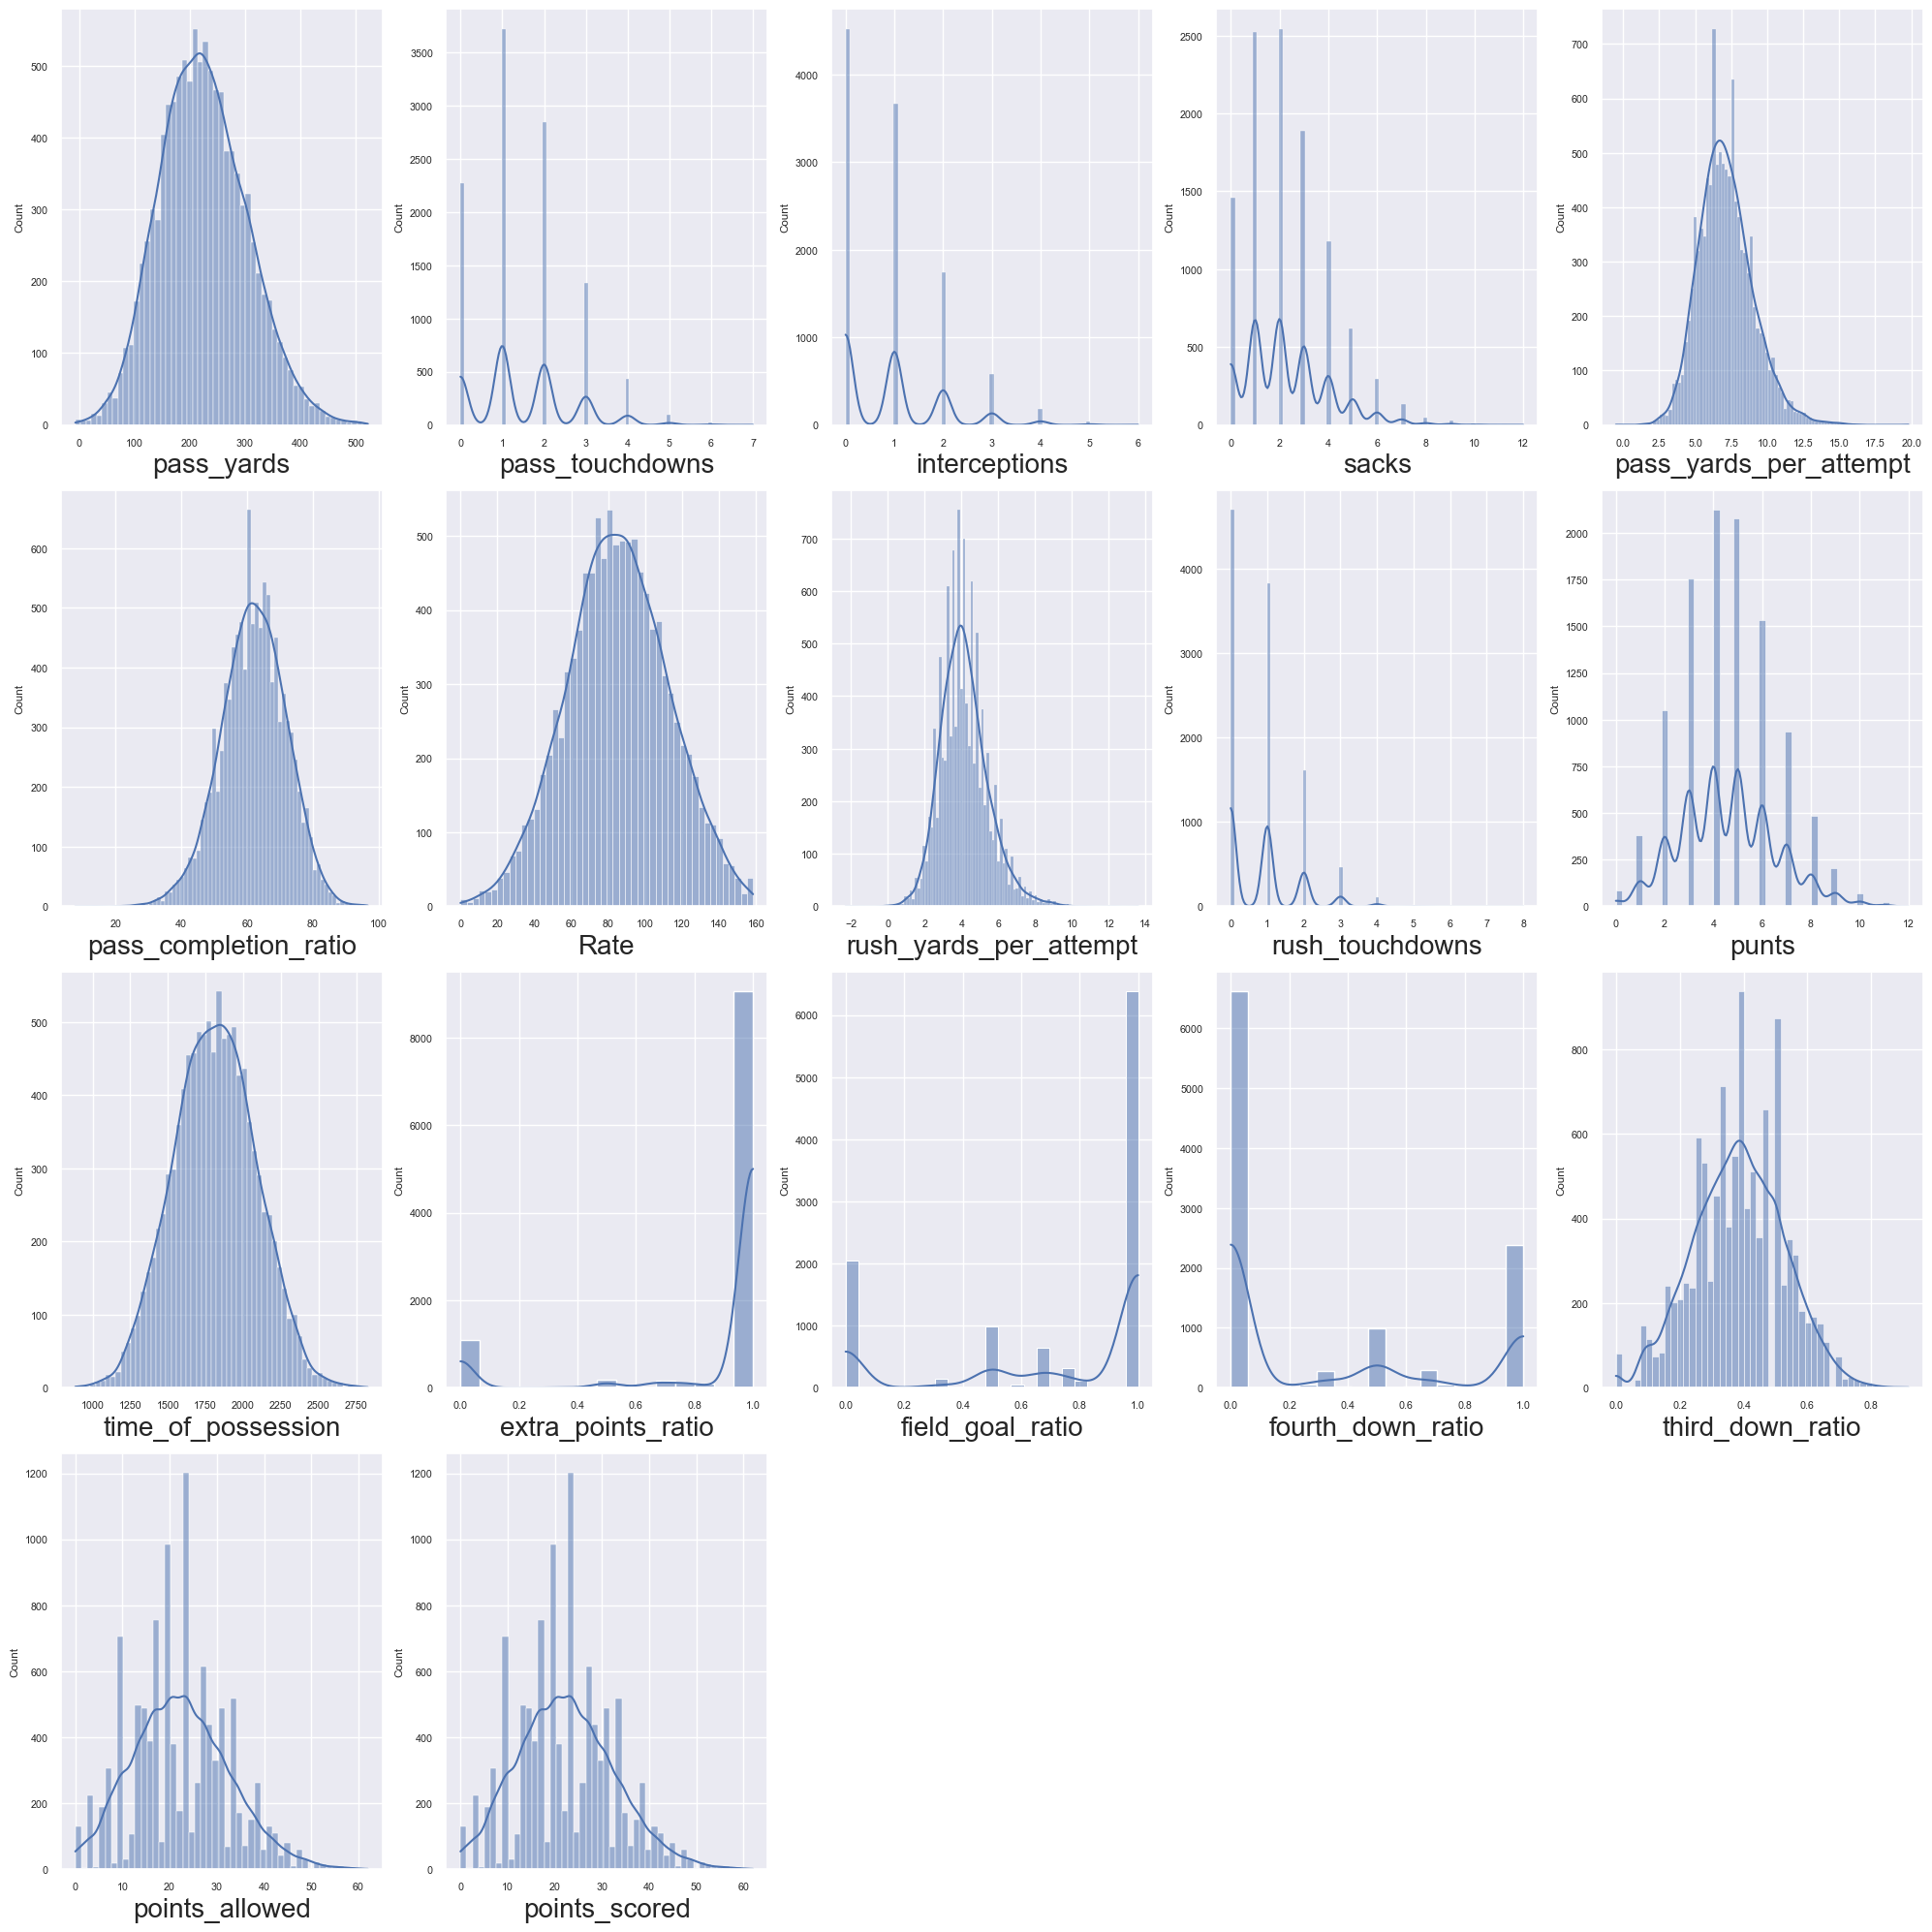

In [516]:
# Calcula el número de filas necesario
num_vars = len(var_num)
num_cols = 5
num_rows = (num_vars + num_cols - 1) // num_cols  # Redondea hacia arriba

# Crear una cuadrícula de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Aplanar el array de ejes para facilitar la iteración
axes = axes.flatten()

# Histogramas
for i, var in enumerate(var_num):
    sns.histplot(data=nfl_df, x=var, kde=True, ax=axes[i])
    #axes[i].set_title(f'Histograma de {var}', fontsize=14)
    axes[i].set_xlabel(var, fontsize=20)

# Elimina los ejes vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

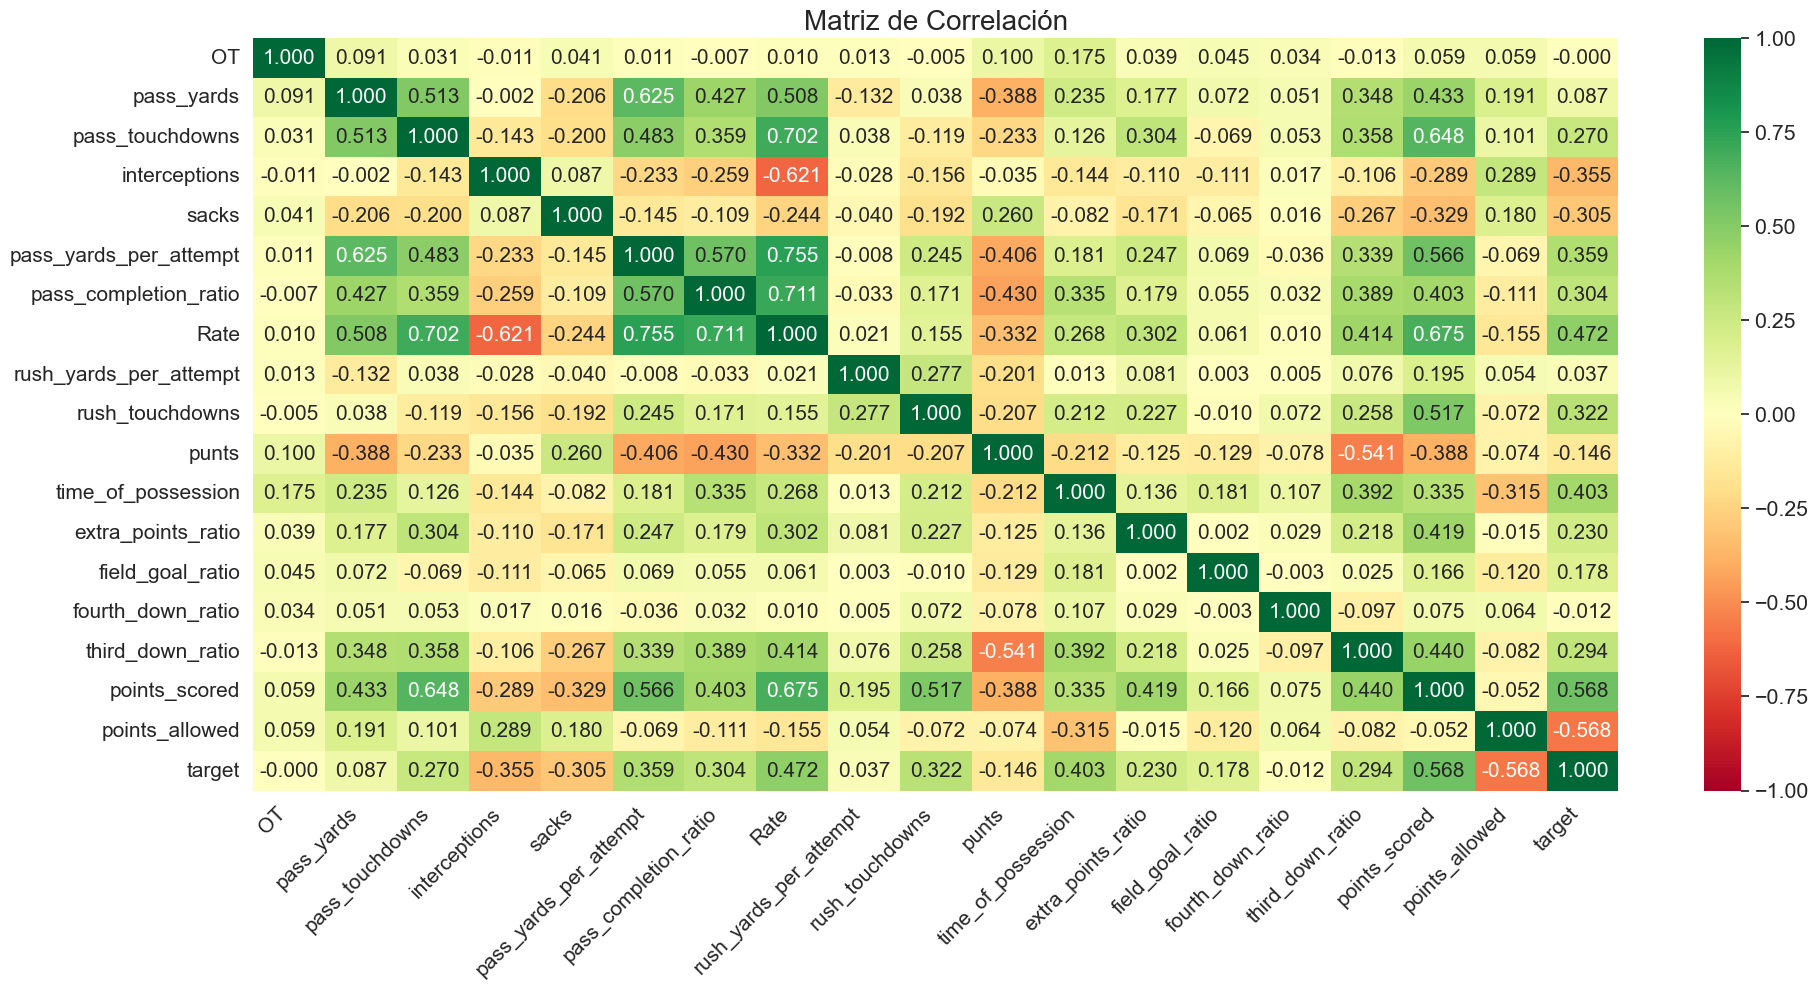

In [791]:
#Seleccionamos las variables numericas y target
# Seleccionamos las variables numéricas y el target
var = ['OT', 'pass_yards', 'pass_touchdowns', 'interceptions', 'sacks', 'pass_yards_per_attempt',
       'pass_completion_ratio', 'Rate', 'rush_yards_per_attempt',
       'rush_touchdowns', 'punts', 'time_of_possession', 'extra_points_ratio',
       'field_goal_ratio', 'fourth_down_ratio', 'third_down_ratio', 'points_scored', 'points_allowed', 'target']

corr_matrix = nfl_df[var].corr()

plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn", vmin=-1, vmax=1, annot_kws={"size": 15}, fmt=".3f")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=15)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=15)
plt.tight_layout()
plt.title("Matriz de Correlación", fontsize=20)
plt.show()

## Variables Categoricas

In [519]:
var_cat = ['Team']

nfl_df[var_cat].describe()
# Decribe method is used to give statistical information on the categorical columns

,Team
count,10728
unique,32
top,NWE
freq,361


# MODELOS MACHINE LEARNING/DEEP LEARNING

In [520]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [521]:
from sklearn.model_selection import train_test_split

X = nfl_df.drop('target',axis=1)  # We delete or objective target from the dataset
y = nfl_df['target'] #We keep our target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [522]:
print(f' X instances: {len(X_train)+len(X_test)}')

print(f' Y instances: {len(y_train)+len(y_test)}')

 X instances: 10728
 Y instances: 10728


In [523]:
print(f' X instances: {len(X_train)}')

print(f' Y instances: {len(X_test)}')

 X instances: 8582
 Y instances: 2146


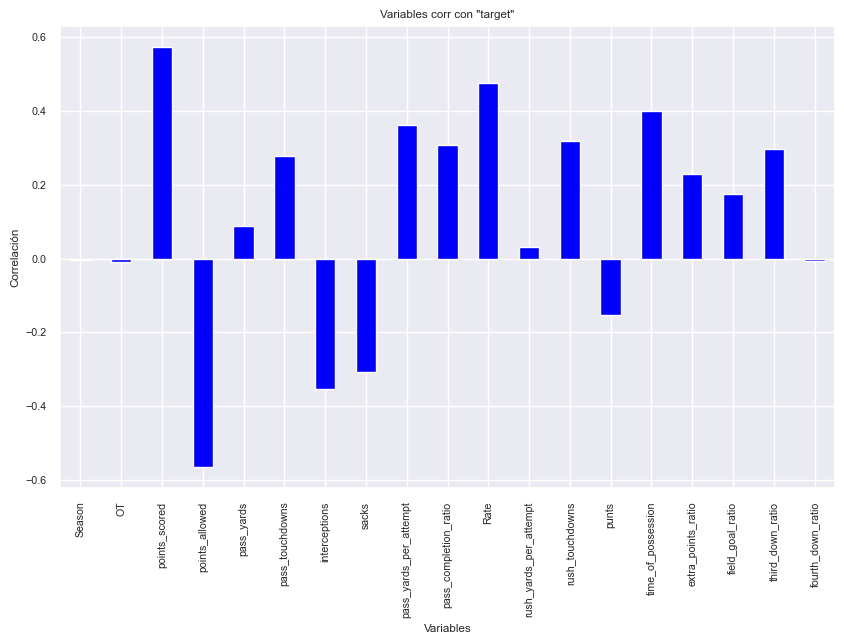

In [524]:
corr_table2 = pd.concat([X_train, y_train], axis=1)
corr_table2

corr_table2_without_self = corr_table2.drop('target', axis=1)#deleting corr with himself

corr_with_target = corr_table2_without_self.corrwith(corr_table2['target'], numeric_only=True)

plt.figure(figsize=(10, 6))
corr_with_target.plot(kind='bar', color='blue')
plt.title('Variables corr con "target"')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.show()

### REGRESION LOGISCTICA

In [530]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

current_features=['OT', 'pass_yards', 'pass_touchdowns', 'interceptions',
       'sacks','pass_yards_per_attempt', 'pass_completion_ratio', 'Rate', 'rush_yards_per_attempt',
       'rush_touchdowns', 'punts', 'time_of_possession', 'extra_points_ratio',
       'field_goal_ratio', 'fourth_down_ratio', 'third_down_ratio', 'points_allowed']


# Crear el modelo de regresión logística multinomial
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Aplicar validación cruzada
cv_scores = cross_val_score(log_model, X_train[current_features], y_train, cv=5, scoring='accuracy')

# Imprimir las puntuaciones de validación cruzada
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores)}\n')

# Entrenar el modelo con todo el conjunto de entrenamiento
log_model.fit(X_train[current_features], y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = log_model.predict(X_test[current_features])

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Model: {accuracy}\n')

# Mostrar la matriz de confusión
confusionMat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusionMat}\n')

# Mostrar el informe de clasificación
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}\n')

Cross-validation scores: [0.9271986  0.92778101 0.92016317 0.91724942 0.91083916]
Mean cross-validation score: 0.9206462727720737

Accuracy with Best Model: 0.9217148182665424

Confusion Matrix:
[[ 977   80]
 [  88 1001]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1057
           1       0.93      0.92      0.92      1089

    accuracy                           0.92      2146
   macro avg       0.92      0.92      0.92      2146
weighted avg       0.92      0.92      0.92      2146




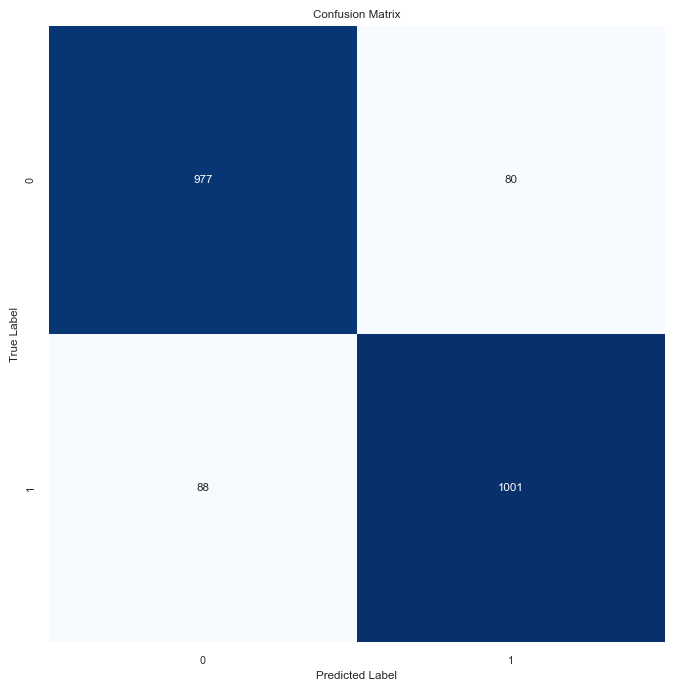

In [526]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusionMat, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=log_model.classes_, yticklabels=log_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [529]:
current_features=['OT', 'pass_yards', 'pass_touchdowns', 'interceptions',
       'sacks','pass_yards_per_attempt', 'pass_completion_ratio', 'Rate', 'rush_yards_per_attempt',
       'rush_touchdowns', 'punts', 'time_of_possession', 'extra_points_ratio',
       'field_goal_ratio', 'fourth_down_ratio', 'third_down_ratio', 'points_allowed']

# Número de muestras a generar mediante bootstrapping
n_samples = 100

# Crear y entrenar el modelo de regresión logística multinomial usando bootstraping
accuracy_scores = []
confusion_matrices = []
classification_reports = []

for _ in range(n_samples):
    # Muestrear con reemplazo los conjuntos de entrenamiento y prueba
    X_train_sample, y_train_sample = resample(X_train[current_features], y_train, random_state=np.random.randint(1000))
    X_test_sample, y_test_sample = resample(X_test[current_features], y_test, random_state=np.random.randint(1000))
    
    # Crear y entrenar el modelo de regresión logística multinomial
    log_model = LogisticRegression()
    log_model.fit(X_train_sample, y_train_sample)

    # Realizar predicciones en el conjunto de prueba
    y_pred = log_model.predict(X_test_sample)

    # Calcular la precisión del modelo y guardarla
    accuracy = accuracy_score(y_test_sample, y_pred)
    accuracy_scores.append(accuracy)

    # Guardar la matriz de confusión
    confusion_matrices.append(confusion_matrix(y_test_sample, y_pred))

    # Guardar el informe de clasificación
    classification_reports.append(classification_report(y_test_sample, y_pred))

# Calcular la precisión promedio
average_accuracy = np.mean(accuracy_scores)
print(f'Average Accuracy with Bootstrapping: {average_accuracy}\n')

# Calcular la matriz de confusión promedio
average_confusion_matrix = np.mean(confusion_matrices, axis=0)
print(f'Average Confusion Matrix:\n{average_confusion_matrix}\n')

# Imprimir el informe de clasificación promedio
print("Average Classification Report:")
print("\n".join(classification_reports[:1]))

Average Accuracy with Bootstrapping: 0.8865843429636534

Average Confusion Matrix:
[[949.9  107.16]
 [136.23 952.71]]

Average Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1039
           1       0.89      0.85      0.87      1107

    accuracy                           0.87      2146
   macro avg       0.87      0.87      0.87      2146
weighted avg       0.87      0.87      0.87      2146



In [531]:
# Obtener las importancias de las características a partir de los coeficientes del modelo
coefficients = log_model.coef_

# Crear un DataFrame para visualizar mejor las importancias (coeficientes)
features_df = pd.DataFrame({
    'Feature': current_features,
    'Coefficient': coefficients[0]  # Si es un problema multiclase, podrías tener múltiples coeficientes
}).sort_values(by='Coefficient', ascending=False)

print(features_df)

                   Feature  Coefficient
13        field_goal_ratio     2.870551
9          rush_touchdowns     2.775403
2          pass_touchdowns     2.258986
12      extra_points_ratio     0.610925
0                       OT     0.282480
3            interceptions     0.183233
5   pass_yards_per_attempt     0.113842
14       fourth_down_ratio     0.085127
7                     Rate     0.049025
11      time_of_possession     0.002091
1               pass_yards    -0.004712
6    pass_completion_ratio    -0.058165
8   rush_yards_per_attempt    -0.154691
4                    sacks    -0.167778
10                   punts    -0.192318
15        third_down_ratio    -0.196180
16          points_allowed    -0.467103


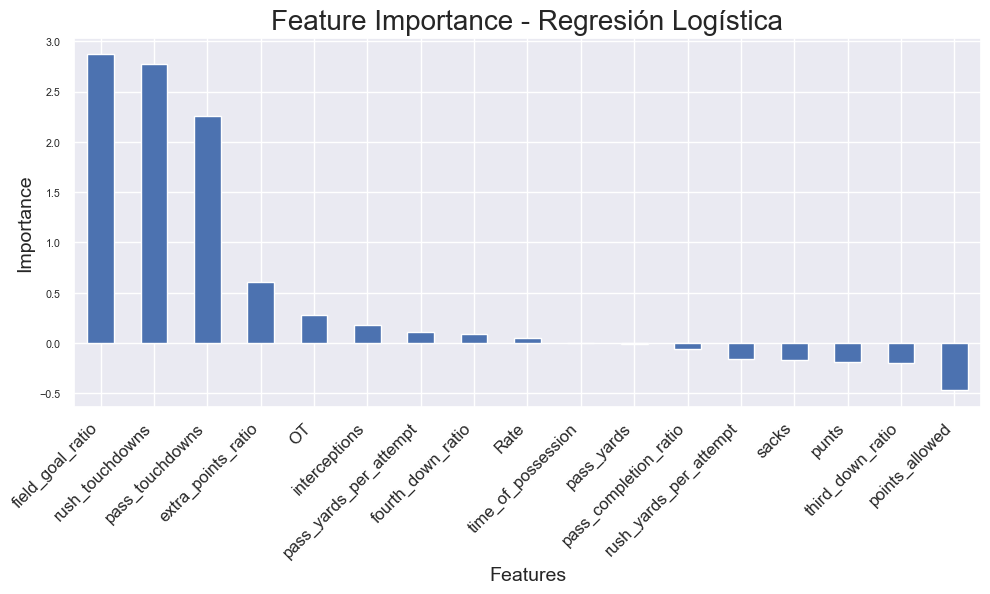

In [597]:
# Obtener los coeficientes del modelo y asociarlos con sus respectivas características
feature_importance = pd.DataFrame(log_model.coef_[0], 
                                  index=current_features, 
                                  columns=['coefficient']).sort_values(by='coefficient', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
ax = feature_importance['coefficient'].plot(kind='bar')
plt.title('Feature Importance - Regresión Logística', fontsize=20)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

#### Predict

In [760]:
#Inferecia con la temporada 2023
y_pred_2023 = log_model.predict(nfl_df_2023[current_features])

#Observamos las predicciones
print(y_pred_2023)

[0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0
 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0
 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1
 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1
 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1
 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1
 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1
 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1
 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1
 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0
 1 1 1 0 1 1 0 0 0 0 0 0 

In [648]:
# Añade las predicciones al DataFrame de la temporada 2023
nfl_df_2023['Prediction_RegLog'] = y_pred_2023

#Vemos como coinciden las predicciones con los resultados reales
nfl_df_2023[['Team', 'target', 'Prediction_RegLog']]

,Team,target,Prediction_RegLog
0,CRD,0,0
1,CRD,0,0
2,CRD,1,1
3,CRD,0,0
4,CRD,0,0
...,...,...,...
565,WAS,0,0
566,WAS,0,0
567,WAS,0,0
568,WAS,0,0


In [761]:
#Calculamos la precision del modelo
accuracy = accuracy_score(nfl_df_2023['target'], y_pred_2023)
print(f'Accuracy with the inference: {accuracy}\n')

# Mostrar la matriz de confusión
confusionMat = confusion_matrix(nfl_df_2023['target'], y_pred_2023)
print(f'Confusion Matrix:\n{confusionMat}\n')

# Mostrar el informe de clasificación
report = classification_report(nfl_df_2023['target'], y_pred_2023)
print(f'Classification Report:\n{report}\n')

Accuracy with the inference: 0.9

Confusion Matrix:
[[250  35]
 [ 22 263]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       285
           1       0.88      0.92      0.90       285

    accuracy                           0.90       570
   macro avg       0.90      0.90      0.90       570
weighted avg       0.90      0.90      0.90       570




#### Predict Prob

In [769]:
# Obtener las probabilidades predichas
y_pred_proba_2023 = log_model.predict_proba(nfl_df_2023[current_features])

#Inferecia con la temporada 2023
#y_pred_2023 = log_model.predict(nfl_df_2023[current_features])

# Verificar las probabilidades para la clase 1 (asumiendo que 1 es la segunda clase)
proba_class_1 = y_pred_proba_2023[:, 1]

# Convertir a formato de punto flotante sin notación científica
proba_class_1_no_sci = [f"{prob:.10f}" for prob in proba_class_1]

# Mostrar las probabilidades predichas
print(f'Predicted probabilities for class 1:\n{proba_class_1_no_sci}\n')

# Verificar el umbral de clasificación
threshold = 0.5
y_pred_2023_threshold = (proba_class_1 >= threshold).astype(int)

# Mostrar los valores predichos con el umbral de 0.5
print(f'Predictions with threshold {threshold}:\n{y_pred_2023_threshold}\n')

# Comparar con los valores originales predichos
#print(f'Original Predictions:\n{y_pred_2023}\n')

Predicted probabilities for class 1:
['0.0075578336', '0.2385319576', '0.9979292720', '0.0039571373', '0.0004661783', '0.0005156310', '0.0244032831', '0.1228751444', '0.0000004697', '0.4994667382', '0.6724285413', '0.0000093191', '0.9999046180', '0.0002546447', '0.0413912900', '0.9657406249', '0.7337810900', '0.9994490097', '0.6654503214', '0.0008722009', '0.0005008576', '0.9520182705', '0.3066442537', '0.9571923401', '0.0252271215', '0.0186279253', '0.9003450405', '0.9731888185', '0.9745508886', '0.0839229546', '0.7758404456', '0.9981244929', '0.0000372701', '0.0000036845', '0.9998331740', '0.9155178097', '0.1994993185', '0.9999976426', '0.2889845226', '0.7011176987', '0.9999999892', '0.9616845076', '0.9999998997', '0.0198948303', '0.9996647251', '0.9965854951', '0.1482637192', '0.9996252849', '0.9944191813', '0.9999998997', '0.2379753215', '0.9999978405', '0.1671140864', '0.0341743120', '0.9999998042', '0.9999981968', '0.9999990701', '0.1059719572', '0.9740734160', '0.2798310049', '0

In [770]:
#Calculamos la precision del modelo
accuracy = accuracy_score(nfl_df_2023['target'], y_pred_2023_threshold)
print(f'Accuracy with the inference: {accuracy}\n')

# Mostrar la matriz de confusión
confusionMat = confusion_matrix(nfl_df_2023['target'], y_pred_2023_threshold)
print(f'Confusion Matrix:\n{confusionMat}\n')

# Mostrar el informe de clasificación
report = classification_report(nfl_df_2023['target'], y_pred_2023_threshold)
print(f'Classification Report:\n{report}\n')

Accuracy with the inference: 0.9

Confusion Matrix:
[[250  35]
 [ 22 263]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       285
           1       0.88      0.92      0.90       285

    accuracy                           0.90       570
   macro avg       0.90      0.90      0.90       570
weighted avg       0.90      0.90      0.90       570




In [651]:
# Añade las predicciones al DataFrame de la temporada 2023
nfl_df_2023['RegLog'] = proba_class_1_no_sci

#Vemos como coinciden las predicciones con los resultados reales
nfl_df_2023[['Team', 'target', 'Prediction_RegLog', 'RegLog']].head(10)

,Team,target,Prediction_RegLog,RegLog
0,CRD,0,0,0.0075578336
1,CRD,0,0,0.2385319576
2,CRD,1,1,0.9979292720
3,CRD,0,0,0.0039571373
4,CRD,0,0,0.0004661783
5,CRD,0,0,0.0005156310
6,CRD,0,0,0.0244032831
7,CRD,0,0,0.1228751444
8,CRD,0,0,0.0000004697
9,CRD,1,0,0.4994667382


### DecisionTreeClassifier

In [566]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

current_features=['OT', 'pass_yards', 'pass_touchdowns', 'interceptions',
       'sacks','pass_yards_per_attempt', 'pass_completion_ratio', 'Rate', 'rush_yards_per_attempt',
       'rush_touchdowns', 'punts', 'time_of_possession', 'extra_points_ratio',
       'field_goal_ratio', 'fourth_down_ratio', 'third_down_ratio', 'points_allowed']

tree_model = DecisionTreeClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 10, random_state= 5)


# Aplicar validación cruzada
cv_scores = cross_val_score(tree_model, X_train[current_features], y_train, cv=5, scoring='accuracy')

# Imprimir las puntuaciones de validación cruzada
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores)}\n')

tree_model.fit(X_train[current_features], y_train)

y_pred = tree_model.predict(X_test[current_features])

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Model: {accuracy}\n')

# Mostrar la matriz de confusión
confusionMat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusionMat}\n')

# Mostrar el informe de clasificación
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}\n')

Cross-validation scores: [0.8747816  0.87885847 0.87004662 0.87237762 0.87237762]
Mean cross-validation score: 0.8736883869382414

Accuracy with Best Model: 0.8718546132339235

Confusion Matrix:
[[930 127]
 [148 941]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1057
           1       0.88      0.86      0.87      1089

    accuracy                           0.87      2146
   macro avg       0.87      0.87      0.87      2146
weighted avg       0.87      0.87      0.87      2146




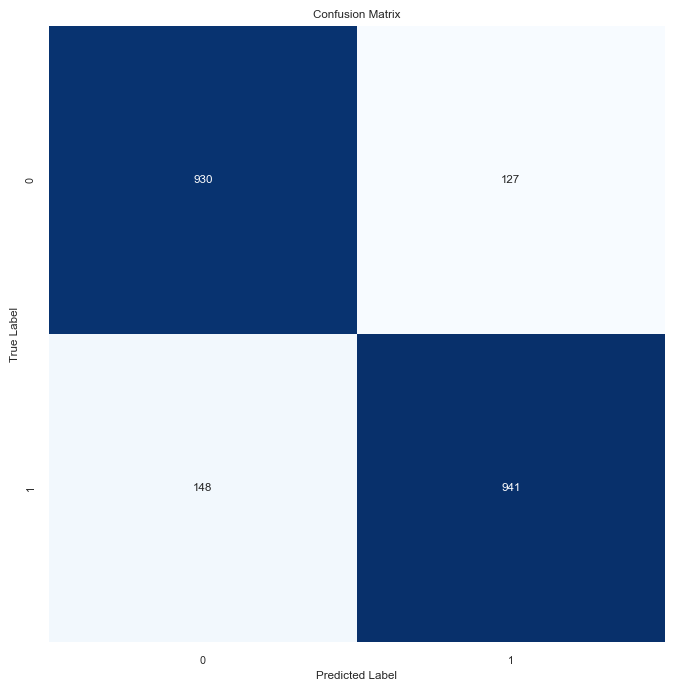

In [547]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusionMat, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=tree_model.classes_, yticklabels=tree_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [551]:
current_features=['OT', 'pass_yards', 'pass_touchdowns', 'interceptions',
       'sacks','pass_yards_per_attempt', 'pass_completion_ratio', 'Rate', 'rush_yards_per_attempt',
       'rush_touchdowns', 'punts', 'time_of_possession', 'extra_points_ratio',
       'field_goal_ratio', 'fourth_down_ratio', 'third_down_ratio', 'points_allowed']

# Número de muestras a generar mediante bootstrapping
n_samples = 100

# Crear y entrenar el modelo de árbol de decisión usando bootstraping
accuracy_scores = []
confusion_matrices = []
classification_reports = []

for _ in range(n_samples):
    # Muestrear con reemplazo los conjuntos de entrenamiento y prueba
    X_train_sample, y_train_sample = resample(X_train[current_features], y_train, random_state=np.random.randint(1000))
    X_test_sample, y_test_sample = resample(X_test[current_features], y_test, random_state=np.random.randint(1000))
    
    # Crear y entrenar el modelo de árbol de decisión
    tree_model = DecisionTreeClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 10, random_state= 5)
    tree_model.fit(X_train_sample, y_train_sample)

    # Realizar predicciones en el conjunto de prueba
    y_pred = tree_model.predict(X_test_sample)

    # Calcular la precisión del modelo y guardarla
    accuracy = accuracy_score(y_test_sample, y_pred)
    accuracy_scores.append(accuracy)

    # Guardar la matriz de confusión
    confusion_matrices.append(confusion_matrix(y_test_sample, y_pred))

    # Guardar el informe de clasificación
    classification_reports.append(classification_report(y_test_sample, y_pred))

# Calcular la precisión promedio
average_accuracy = np.mean(accuracy_scores)
print(f'Average Accuracy with Bootstrapping: {average_accuracy}\n')

# Calcular la matriz de confusión promedio
average_confusion_matrix = np.mean(confusion_matrices, axis=0)
print(f'Average Confusion Matrix:\n{average_confusion_matrix}\n')

# Imprimir el informe de clasificación promedio
print("Average Classification Report:")
print("\n".join(classification_reports[:1]))

Average Accuracy with Bootstrapping: 0.8558434296365331

Average Confusion Matrix:
[[917.22 139.1 ]
 [170.26 919.42]]

Average Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1097
           1       0.85      0.84      0.84      1049

    accuracy                           0.85      2146
   macro avg       0.85      0.85      0.85      2146
weighted avg       0.85      0.85      0.85      2146



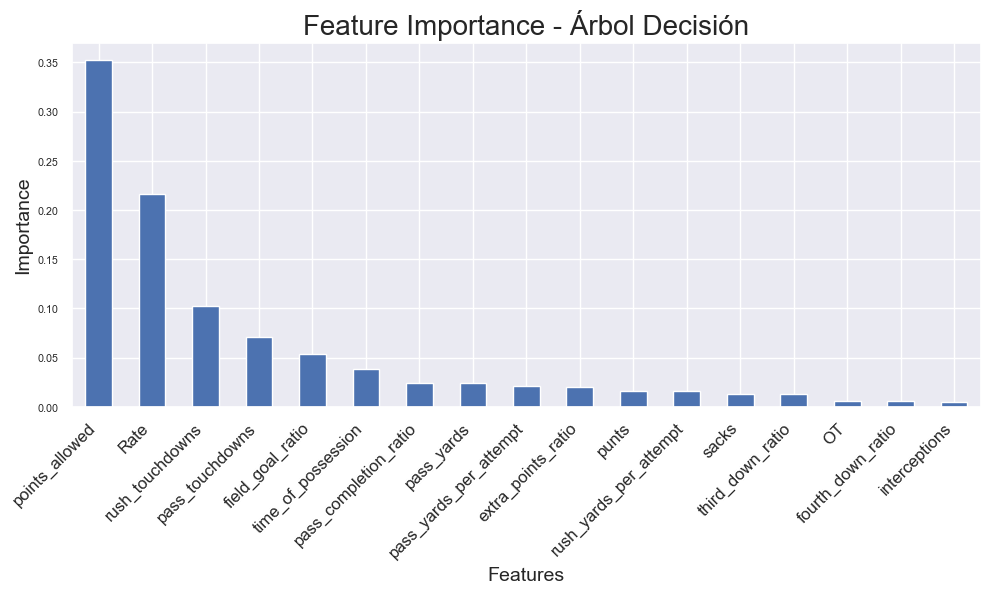

In [598]:
# Obtener los coeficientes del modelo y asociarlos con sus respectivas características
feature_importance = pd.DataFrame(tree_model.feature_importances_, 
                                  index=current_features, 
                                  columns=['coefficient']).sort_values(by='coefficient', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
ax = feature_importance['coefficient'].plot(kind='bar')
plt.title('Feature Importance - Árbol Decisión', fontsize=20)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

#### Predict

In [652]:
#Inferecia con la temporada 2023
y_pred_2023 = tree_model.predict(nfl_df_2023[current_features])

#Observamos las predicciones
print(y_pred_2023)

[0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0
 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1
 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1
 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1
 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1
 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1
 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1
 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1
 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1
 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0
 1 1 1 1 1 1 0 0 0 0 0 0 

In [653]:
# Añade las predicciones al DataFrame de la temporada 2023
nfl_df_2023['Prediction_ArbolDecision'] = y_pred_2023

#Vemos como coinciden las predicciones con los resultados reales
nfl_df_2023[['Team', 'target', 'Prediction_ArbolDecision']]

,Team,target,Prediction_ArbolDecision
0,CRD,0,0
1,CRD,0,1
2,CRD,1,1
3,CRD,0,0
4,CRD,0,0
...,...,...,...
565,WAS,0,0
566,WAS,0,0
567,WAS,0,0
568,WAS,0,0


In [654]:
#Calculamos la precision del modelo
accuracy = accuracy_score(nfl_df_2023['target'], y_pred_2023)
print(f'Accuracy with inference: {accuracy}\n')

# Mostrar la matriz de confusión
confusionMat = confusion_matrix(nfl_df_2023['target'], y_pred_2023)
print(f'Confusion Matrix:\n{confusionMat}\n')

# Mostrar el informe de clasificación
report = classification_report(nfl_df_2023['target'], y_pred_2023)
print(f'Classification Report:\n{report}\n')

Accuracy with inference: 0.8596491228070176

Confusion Matrix:
[[243  42]
 [ 38 247]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       285
           1       0.85      0.87      0.86       285

    accuracy                           0.86       570
   macro avg       0.86      0.86      0.86       570
weighted avg       0.86      0.86      0.86       570




#### Predict Prob

In [775]:
# Obtener las probabilidades predichas
y_pred_proba_2023 = tree_model.predict_proba(nfl_df_2023[current_features])

#Inferecia con la temporada 2023
y_pred_2023 = tree_model.predict(nfl_df_2023[current_features])

# Verificar las probabilidades para la clase 1 (asumiendo que 1 es la segunda clase)
proba_class_1 = y_pred_proba_2023[:, 1]

# Convertir a formato de punto flotante sin notación científica
proba_class_1_no_sci = [f"{prob:.10f}" for prob in proba_class_1]

# Mostrar las probabilidades predichas
print(f'Predicted probabilities for class 1:\n{proba_class_1_no_sci}\n')

# Verificar el umbral de clasificación
threshold = 0.5
y_pred_2023_threshold = (proba_class_1 >= threshold).astype(int)

# Mostrar los valores predichos con el umbral de 0.5
print(f'Predictions with threshold {threshold}:\n{y_pred_2023_threshold}\n')

# Comparar con los valores originales predichos
#print(f'Original Predictions:\n{y_pred_2023}\n')

Predicted probabilities for class 1:
['0.0000000000', '0.7500000000', '1.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '0.0000000000', '1.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '0.0000000000', '0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '1.0000000000', '0.0000000000', '0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '0.0000000000', '0.0000000000', '0.5000000000', '1.0000000000', '1.0000000000', '0.5000000000', '0.0000000000', '1.0000000000', '0.0000000000', '0.0000000000', '1.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '1.0000000000', '0.3750000000', '1.0000000000', '1.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '1.0000000000', '0.0000000000', '1.0000000000', '0.0000000000', '1

In [776]:
#Calculamos la precision del modelo
accuracy = accuracy_score(nfl_df_2023['target'], y_pred_2023_threshold)
print(f'Accuracy with the inference: {accuracy}\n')

# Mostrar la matriz de confusión
confusionMat = confusion_matrix(nfl_df_2023['target'], y_pred_2023_threshold)
print(f'Confusion Matrix:\n{confusionMat}\n')

# Mostrar el informe de clasificación
report = classification_report(nfl_df_2023['target'], y_pred_2023_threshold)
print(f'Classification Report:\n{report}\n')

Accuracy with the inference: 0.8578947368421053

Confusion Matrix:
[[237  48]
 [ 33 252]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       285
           1       0.84      0.88      0.86       285

    accuracy                           0.86       570
   macro avg       0.86      0.86      0.86       570
weighted avg       0.86      0.86      0.86       570




In [656]:
# Añade las predicciones al DataFrame de la temporada 2023
nfl_df_2023['ArbolDecision'] = proba_class_1_no_sci

#Vemos como coinciden las predicciones con los resultados reales
nfl_df_2023[['Team', 'target', 'Prediction_ArbolDecision', 'ArbolDecision']].head(10)

,Team,target,Prediction_ArbolDecision,ArbolDecision
0,CRD,0,0,0.0000000000
1,CRD,0,1,0.7500000000
2,CRD,1,1,1.0000000000
3,CRD,0,0,0.0000000000
4,CRD,0,0,0.0000000000
5,CRD,0,0,0.0000000000
6,CRD,0,0,0.0000000000
7,CRD,0,0,0.0000000000
8,CRD,0,0,0.0000000000
9,CRD,1,1,1.0000000000


### RandomForestClassifier

In [581]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

current_features=['OT', 'pass_yards', 'pass_touchdowns', 'interceptions',
       'sacks','pass_yards_per_attempt', 'pass_completion_ratio', 'Rate', 'rush_yards_per_attempt',
       'rush_touchdowns', 'punts', 'time_of_possession', 'extra_points_ratio',
       'field_goal_ratio', 'fourth_down_ratio', 'third_down_ratio', 'points_allowed']

rf_model = RandomForestClassifier(n_estimators=10,max_depth= 10,min_samples_split= 10,min_samples_leaf=4 , random_state=101)

# Aplicar validación cruzada
cv_scores = cross_val_score(rf_model, X_train[current_features], y_train, cv=5, scoring='accuracy')

# Imprimir las puntuaciones de validación cruzada
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores)}\n')

rf_model.fit(X_train[current_features],y_train)

y_pred = rf_model.predict(X_test[current_features])

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Model: {accuracy}\n')

# Mostrar la matriz de confusión
confusionMat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusionMat}\n')

# Mostrar el informe de clasificación
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}\n')

Cross-validation scores: [0.87885847 0.88759464 0.87237762 0.87412587 0.87937063]
Mean cross-validation score: 0.8784654483547902

Accuracy with Best Model: 0.8737185461323392

Confusion Matrix:
[[945 112]
 [159 930]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1057
           1       0.89      0.85      0.87      1089

    accuracy                           0.87      2146
   macro avg       0.87      0.87      0.87      2146
weighted avg       0.87      0.87      0.87      2146




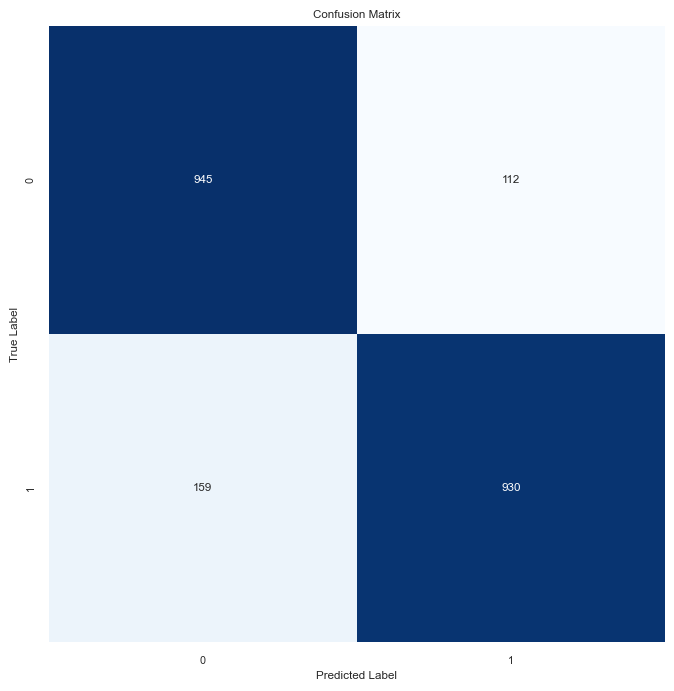

In [553]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusionMat, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [561]:
current_features=['OT', 'pass_yards', 'pass_touchdowns', 'interceptions',
       'sacks','pass_yards_per_attempt', 'pass_completion_ratio', 'Rate', 'rush_yards_per_attempt',
       'rush_touchdowns', 'punts', 'time_of_possession', 'extra_points_ratio',
       'field_goal_ratio', 'fourth_down_ratio', 'third_down_ratio', 'points_allowed']

# Número de muestras a generar mediante bootstrapping
n_samples = 100

# Crear y entrenar el modelo de Bosques Aleatorios usando bootstraping
accuracy_scores = []
confusion_matrices = []
classification_reports = []

for _ in range(n_samples):
    # Muestrear con reemplazo los conjuntos de entrenamiento y prueba
    X_train_sample, y_train_sample = resample(X_train[current_features], y_train, random_state=np.random.randint(1000))
    X_test_sample, y_test_sample = resample(X_test[current_features], y_test, random_state=np.random.randint(1000))
    
    # Crear y entrenar el modelo de Bosques Aleatorios
    rf_model = RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_split=10, min_samples_leaf=4, random_state=101)
    rf_model.fit(X_train_sample, y_train_sample)

    # Realizar predicciones en el conjunto de prueba
    y_pred = rf_model.predict(X_test_sample)

    # Calcular la precisión del modelo y guardarla
    accuracy = accuracy_score(y_test_sample, y_pred)
    accuracy_scores.append(accuracy)

    # Guardar la matriz de confusión
    confusion_matrices.append(confusion_matrix(y_test_sample, y_pred))

    # Guardar el informe de clasificación
    classification_reports.append(classification_report(y_test_sample, y_pred))

# Calcular la precisión promedio
average_accuracy = np.mean(accuracy_scores)
print(f'Average Accuracy with Bootstrapping: {average_accuracy}\n')

# Calcular la matriz de confusión promedio
average_confusion_matrix = np.mean(confusion_matrices, axis=0)
print(f'Average Confusion Matrix:\n{average_confusion_matrix}\n')

# Imprimir el informe de clasificación promedio
print("Average Classification Report:")
print("\n".join(classification_reports[:1]))

Average Accuracy with Bootstrapping: 0.8772460391425909

Average Confusion Matrix:
[[951.94 108.55]
 [154.88 930.63]]

Average Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1009
           1       0.91      0.86      0.88      1137

    accuracy                           0.88      2146
   macro avg       0.88      0.88      0.88      2146
weighted avg       0.88      0.88      0.88      2146



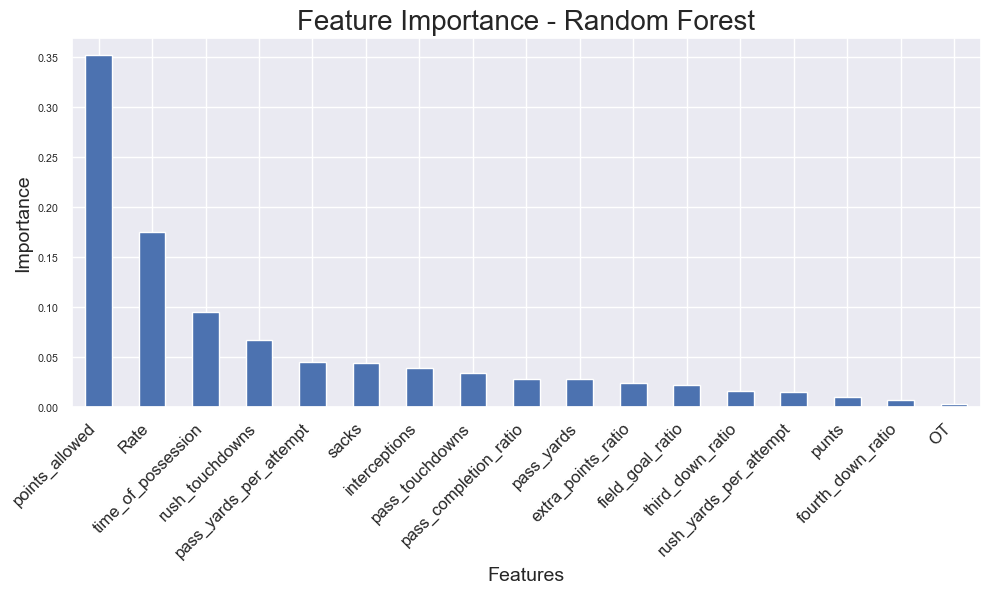

In [594]:
# Obtener los coeficientes del modelo y asociarlos con sus respectivas características
feature_importance = pd.DataFrame(rf_model.feature_importances_, 
                                  index=current_features, 
                                  columns=['coefficient']).sort_values(by='coefficient', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
ax = feature_importance['coefficient'].plot(kind='bar')
plt.title('Feature Importance - Random Forest', fontsize=20)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

                   Feature  Importance
16          points_allowed    0.351660
7                     Rate    0.175051
11      time_of_possession    0.094893
9          rush_touchdowns    0.067041
5   pass_yards_per_attempt    0.044440
4                    sacks    0.043414
3            interceptions    0.038958
2          pass_touchdowns    0.033615
6    pass_completion_ratio    0.028174
1               pass_yards    0.027572
12      extra_points_ratio    0.024042
13        field_goal_ratio    0.021834
15        third_down_ratio    0.015725
8   rush_yards_per_attempt    0.014446
10                   punts    0.010027
14       fourth_down_ratio    0.006425
0                       OT    0.002683


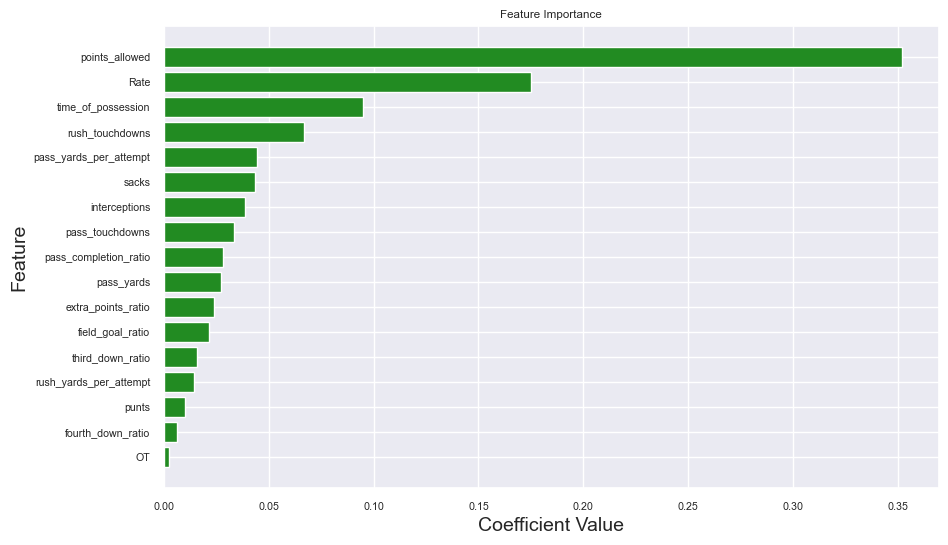

In [558]:
# Obtener las importancias de las características del modelo entrenado
feature_importances = rf_model.feature_importances_

# Crear un DataFrame para visualizar mejor las importancias
features_df = pd.DataFrame({
    'Feature': current_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(features_df)

# Visualización de las importancias de las características
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='forestgreen')
plt.ylabel('Feature', fontsize=14)
plt.xlabel('Coefficient Value', fontsize=14)
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la característica más importante en la parte superior
plt.show()

#### Predict

In [657]:
#Inferecia con la temporada 2023
y_pred_2023 = rf_model.predict(nfl_df_2023[current_features])

#Observamos las predicciones
print(y_pred_2023)

[0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1
 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1
 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1
 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1
 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1
 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0
 0 1 1 1 1 1 0 0 1 0 0 0 

In [658]:
# Añade las predicciones al DataFrame de la temporada 2023
nfl_df_2023['Prediction_RandomForest'] = y_pred_2023

#Vemos como coinciden las predicciones con los resultados reales
nfl_df_2023[['Team', 'target', 'Prediction_RandomForest']]

,Team,target,Prediction_RandomForest
0,CRD,0,0
1,CRD,0,1
2,CRD,1,1
3,CRD,0,0
4,CRD,0,0
...,...,...,...
565,WAS,0,0
566,WAS,0,0
567,WAS,0,0
568,WAS,0,0


In [659]:
#Calculamos la precision del modelo
accuracy = accuracy_score(nfl_df_2023['target'], y_pred_2023)
print(f'Accuracy with Best Model: {accuracy}\n')

# Mostrar la matriz de confusión
confusionMat = confusion_matrix(nfl_df_2023['target'], y_pred_2023)
print(f'Confusion Matrix:\n{confusionMat}\n')

# Mostrar el informe de clasificación
report = classification_report(nfl_df_2023['target'], y_pred_2023)
print(f'Classification Report:\n{report}\n')

Accuracy with Best Model: 0.875438596491228

Confusion Matrix:
[[252  33]
 [ 38 247]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       285
           1       0.88      0.87      0.87       285

    accuracy                           0.88       570
   macro avg       0.88      0.88      0.88       570
weighted avg       0.88      0.88      0.88       570




#### Predict Prob

In [783]:
# Obtener las probabilidades predichas
y_pred_proba_2023 = rf_model.predict_proba(nfl_df_2023[current_features])

#Inferecia con la temporada 2023
y_pred_2023 = rf_model.predict(nfl_df_2023[current_features])

# Verificar las probabilidades para la clase 1 (asumiendo que 1 es la segunda clase)
proba_class_1 = y_pred_proba_2023[:, 1]

# Convertir a formato de punto flotante sin notación científica
proba_class_1_no_sci = [f"{prob:.10f}" for prob in proba_class_1]

# Mostrar las probabilidades predichas
print(f'Predicted probabilities for class 1:\n{proba_class_1_no_sci}\n')

# Verificar el umbral de clasificación
threshold = 0.5
y_pred_2023_threshold = (proba_class_1 >= threshold).astype(int)

# Mostrar los valores predichos con el umbral de 0.5
print(f'Predictions with threshold {threshold}:\n{y_pred_2023_threshold}\n')

# Comparar con los valores originales predichos
#print(f'Original Predictions:\n{y_pred_2023}\n')

Predicted probabilities for class 1:
['0.2012855069', '0.5831849110', '0.9667441860', '0.1828869697', '0.0056351824', '0.0136192160', '0.2507888215', '0.2077653675', '0.0020026568', '0.3853050467', '0.5146822992', '0.0953012911', '0.9808440927', '0.0259312486', '0.2815465604', '0.6955137845', '0.8775045336', '0.9029879329', '0.3880142555', '0.0015919564', '0.0171117795', '0.9662596337', '0.1197421930', '0.9146325216', '0.0966094807', '0.0694283937', '0.4188389364', '0.9178095238', '0.7924154793', '0.3840389226', '0.5645911654', '0.8793670014', '0.0162573087', '0.0801195250', '0.8994047619', '0.8504255264', '0.3048821329', '0.8974510955', '0.3648060383', '0.9232051282', '0.9959183673', '0.6723607024', '0.9246280681', '0.2717125306', '0.9911971831', '0.9901493811', '0.2146591361', '0.8957010582', '0.9773927648', '0.9686456401', '0.2816295567', '0.9959514170', '0.4177761310', '0.3196449340', '1.0000000000', '0.9705514706', '0.9722577892', '0.2315279165', '0.7403541907', '0.2261646474', '0

In [784]:
#Calculamos la precision del modelo
accuracy = accuracy_score(nfl_df_2023['target'], y_pred_2023_threshold)
print(f'Accuracy with the inference: {accuracy}\n')

# Mostrar la matriz de confusión
confusionMat = confusion_matrix(nfl_df_2023['target'], y_pred_2023_threshold)
print(f'Confusion Matrix:\n{confusionMat}\n')

# Mostrar el informe de clasificación
report = classification_report(nfl_df_2023['target'], y_pred_2023_threshold)
print(f'Classification Report:\n{report}\n')

Accuracy with the inference: 0.875438596491228

Confusion Matrix:
[[252  33]
 [ 38 247]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       285
           1       0.88      0.87      0.87       285

    accuracy                           0.88       570
   macro avg       0.88      0.88      0.88       570
weighted avg       0.88      0.88      0.88       570




In [661]:
# Añade las predicciones al DataFrame de la temporada 2023
nfl_df_2023['RandomForest'] = proba_class_1_no_sci

#Vemos como coinciden las predicciones con los resultados reales
nfl_df_2023[['Team', 'target', 'Prediction_RandomForest', 'RandomForest']].head(10)

,Team,target,Prediction_RandomForest,RandomForest
0,CRD,0,0,0.2012855069
1,CRD,0,1,0.5831849110
2,CRD,1,1,0.9667441860
3,CRD,0,0,0.1828869697
4,CRD,0,0,0.0056351824
5,CRD,0,0,0.0136192160
6,CRD,0,0,0.2507888215
7,CRD,0,0,0.2077653675
8,CRD,0,0,0.0020026568
9,CRD,1,0,0.3853050467


### XGB

In [665]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

current_features=['OT', 'pass_yards', 'pass_touchdowns', 'interceptions',
       'sacks','pass_yards_per_attempt', 'pass_completion_ratio', 'Rate', 'rush_yards_per_attempt',
       'rush_touchdowns', 'punts', 'time_of_possession', 'extra_points_ratio',
       'field_goal_ratio', 'fourth_down_ratio', 'third_down_ratio', 'points_allowed']

# Crear el modelo XGBClassifier para clasificación binaria
model_xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=101, eval_metric="logloss",
                          learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8,
                          colsample_bytree=0.8, reg_alpha=0, reg_lambda=0)

# Aplicar validación cruzada
cv_scores = cross_val_score(model_xgb, X_train[current_features], y_train, cv=5, scoring='accuracy')

# Imprimir las puntuaciones de validación cruzada
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores)}\n')

# Entrenar el modelo
model_xgb.fit(X_train[current_features], y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model_xgb.predict(X_test[current_features])

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Model: {accuracy}\n')

# Mostrar la matriz de confusión
confusionMat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusionMat}\n')

# Mostrar el informe de clasificación
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}\n')

Cross-validation scores: [0.92486896 0.9219569  0.91899767 0.92016317 0.90792541]
Mean cross-validation score: 0.9187824212285483

Accuracy with Best Model: 0.923578751164958

Confusion Matrix:
[[998  59]
 [105 984]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1057
           1       0.94      0.90      0.92      1089

    accuracy                           0.92      2146
   macro avg       0.92      0.92      0.92      2146
weighted avg       0.92      0.92      0.92      2146




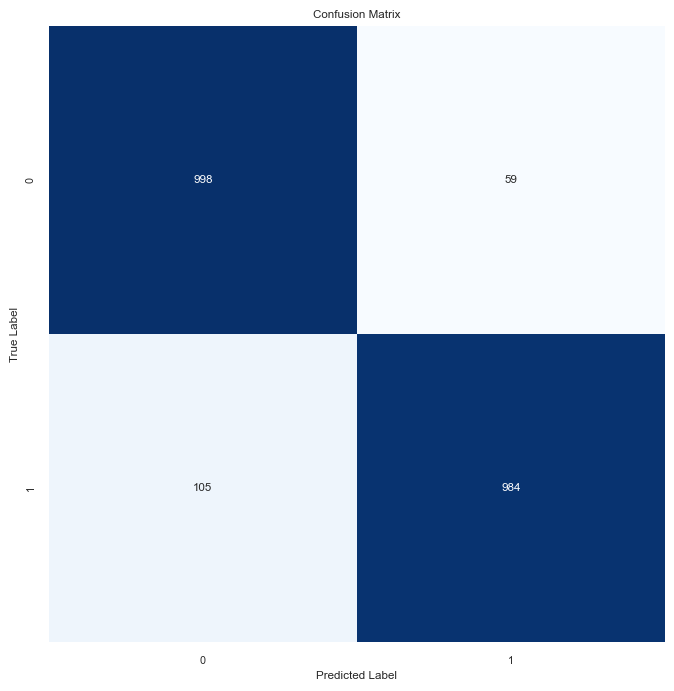

In [584]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusionMat, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=model_xgb.classes_, yticklabels=model_xgb.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [599]:
# Número de muestras a generar mediante bootstrapping
n_samples = 100

# Crear y entrenar el modelo XGBClassifier usando bootstraping
accuracy_scores = []
confusion_matrices = []
classification_reports = []

for _ in range(n_samples):
    # Muestrear con reemplazo los conjuntos de entrenamiento y prueba
    X_train_sample, y_train_sample = resample(X_train[current_features], y_train, random_state=np.random.randint(1000))
    X_test_sample, y_test_sample = resample(X_test[current_features], y_test, random_state=np.random.randint(1000))
    
    # Crear y entrenar el modelo XGBClassifier
    model_xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=101, eval_metric="logloss",
                               learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8,
                               colsample_bytree=0.8, reg_alpha=0, reg_lambda=0)
    model_xgb.fit(X_train_sample, y_train_sample)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model_xgb.predict(X_test_sample)

    # Calcular la precisión del modelo y guardarla
    accuracy = accuracy_score(y_test_sample, y_pred)
    accuracy_scores.append(accuracy)

    # Guardar la matriz de confusión
    confusion_matrices.append(confusion_matrix(y_test_sample, y_pred))

    # Guardar el informe de clasificación
    classification_reports.append(classification_report(y_test_sample, y_pred))

# Calcular la precisión promedio
average_accuracy = np.mean(accuracy_scores)
print(f'Average Accuracy with Bootstrapping: {average_accuracy}\n')

# Calcular la matriz de confusión promedio
average_confusion_matrix = np.mean(confusion_matrices, axis=0)
print(f'Average Confusion Matrix:\n{average_confusion_matrix}\n')

# Imprimir el informe de clasificación promedio
print("Average Classification Report:")
print("\n".join(classification_reports[:1]))

Average Accuracy with Bootstrapping: 0.9181733457595525

Average Confusion Matrix:
[[987.47  67.34]
 [108.26 982.93]]

Average Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1082
           1       0.93      0.90      0.92      1064

    accuracy                           0.92      2146
   macro avg       0.92      0.92      0.92      2146
weighted avg       0.92      0.92      0.92      2146



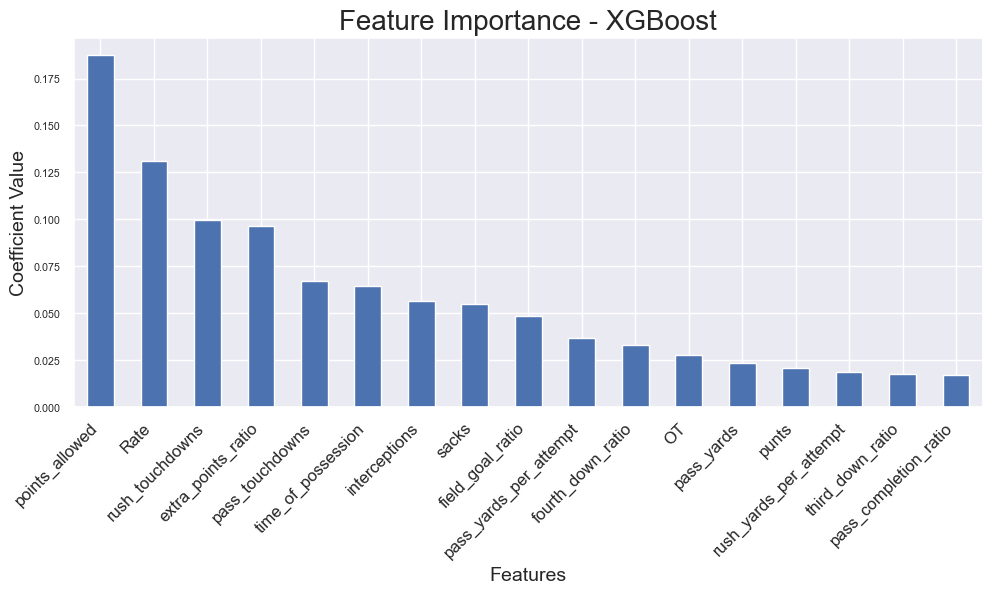

In [593]:
# Obtener los coeficientes del modelo y asociarlos con sus respectivas características
feature_importance = pd.DataFrame(model_xgb.feature_importances_, 
                                  index=current_features, 
                                  columns=['coefficient']).sort_values(by='coefficient', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
ax = feature_importance['coefficient'].plot(kind='bar')
plt.title('Feature Importance - XGBoost', fontsize=20)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

#### Predict

In [666]:
#Inferecia con la temporada 2023
y_pred_2023 = model_xgb.predict(nfl_df_2023[current_features])

#Observamos las predicciones
print(y_pred_2023)

[0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0
 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1
 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1
 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1
 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1
 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1
 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0
 1 1 1 0 1 1 0 0 1 0 0 0 

In [667]:
# Añade las predicciones al DataFrame de la temporada 2023
nfl_df_2023['Prediction_XGB'] = y_pred_2023

#Vemos como coinciden las predicciones con los resultados reales
nfl_df_2023[['Team', 'target', 'Prediction_XGB']]

,Team,target,Prediction_XGB
0,CRD,0,0
1,CRD,0,0
2,CRD,1,1
3,CRD,0,0
4,CRD,0,0
...,...,...,...
565,WAS,0,0
566,WAS,0,0
567,WAS,0,0
568,WAS,0,0


In [668]:
#Calculamos la precision del modelo
accuracy = accuracy_score(nfl_df_2023['target'], y_pred_2023)
print(f'Accuracy with inference: {accuracy}\n')

# Mostrar la matriz de confusión
confusionMat = confusion_matrix(nfl_df_2023['target'], y_pred_2023)
print(f'Confusion Matrix:\n{confusionMat}\n')

# Mostrar el informe de clasificación
report = classification_report(nfl_df_2023['target'], y_pred_2023)
print(f'Classification Report:\n{report}\n')

Accuracy with inference: 0.9087719298245615

Confusion Matrix:
[[259  26]
 [ 26 259]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       285
           1       0.91      0.91      0.91       285

    accuracy                           0.91       570
   macro avg       0.91      0.91      0.91       570
weighted avg       0.91      0.91      0.91       570




#### Predict Prob

In [669]:
# Obtener las probabilidades predichas
y_pred_proba_2023 = model_xgb.predict_proba(nfl_df_2023[current_features])

#Inferecia con la temporada 2023
y_pred_2023 = model_xgb.predict(nfl_df_2023[current_features])

# Verificar las probabilidades para la clase 1 (asumiendo que 1 es la segunda clase)
proba_class_1 = y_pred_proba_2023[:, 1]

# Convertir a formato de punto flotante sin notación científica
proba_class_1_no_sci = [f"{prob:.10f}" for prob in proba_class_1]

# Mostrar las probabilidades predichas
print(f'Predicted probabilities for class 1:\n{proba_class_1_no_sci}\n')

# Verificar el umbral de clasificación
threshold = 0.5
y_pred_2023_threshold = (proba_class_1 >= threshold).astype(int)

# Mostrar los valores predichos con el umbral de 0.5
print(f'Predictions with threshold {threshold}:\n{y_pred_2023_threshold}\n')

# Comparar con los valores originales predichos
#print(f'Original Predictions:\n{y_pred_2023}\n')

Predicted probabilities for class 1:
['0.0937144905', '0.3587569296', '0.9961746931', '0.0253628232', '0.0031285048', '0.0056915223', '0.0185729302', '0.0734154433', '0.0018339107', '0.5559938550', '0.5245655179', '0.0009417120', '0.9984753728', '0.0158946402', '0.0669088662', '0.9485865831', '0.6495813727', '0.9959312081', '0.5036325455', '0.0132987360', '0.0025191358', '0.9177941084', '0.1436947435', '0.9459794164', '0.0150290914', '0.0389303192', '0.7743518949', '0.9115939736', '0.9515318871', '0.0681550428', '0.6004256606', '0.9961122870', '0.0016684415', '0.0199735891', '0.9961445332', '0.9380285144', '0.2410605103', '0.9989504218', '0.2001283765', '0.7111447453', '0.9998561144', '0.9202147722', '0.9996513128', '0.0270915702', '0.9979103208', '0.9978755713', '0.1559606493', '0.9992105961', '0.9954480529', '0.9990900755', '0.3409749568', '0.9996002316', '0.1931298822', '0.0787718892', '0.9998376369', '0.9993091822', '0.9994008541', '0.1540053785', '0.9216946959', '0.0417751521', '0

In [670]:
# Añade las predicciones al DataFrame de la temporada 2023
nfl_df_2023['XGB'] = proba_class_1_no_sci

#Vemos como coinciden las predicciones con los resultados reales
nfl_df_2023[['Team', 'target', 'Prediction_XGB', 'XGB']]

,Team,target,Prediction_XGB,XGB
0,CRD,0,0,0.0937144905
1,CRD,0,0,0.3587569296
2,CRD,1,1,0.9961746931
3,CRD,0,0,0.0253628232
4,CRD,0,0,0.0031285048
...,...,...,...,...
565,WAS,0,0,0.0024541542
566,WAS,0,0,0.0378354043
567,WAS,0,0,0.1654304266
568,WAS,0,0,0.0073355590


### LightGBM

In [671]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

current_features=['OT', 'pass_yards', 'pass_touchdowns', 'interceptions',
       'sacks','pass_yards_per_attempt', 'pass_completion_ratio', 'Rate', 'rush_yards_per_attempt',
       'rush_touchdowns', 'punts', 'time_of_possession', 'extra_points_ratio',
       'field_goal_ratio', 'fourth_down_ratio', 'third_down_ratio', 'points_allowed']

# Crear el modelo LightGBM
model_lgb = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.5, max_depth=3, metric="binary_logloss", random_state=101)


# Aplicar validación cruzada
cv_scores = cross_val_score(model_lgb, X_train[current_features], y_train, cv=5, scoring='accuracy')

# Imprimir las puntuaciones de validación cruzada
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores)}\n')

# Entrenar el modelo
model_lgb.fit(X_train[current_features], y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model_lgb.predict(X_test[current_features])

[LightGBM] [Info] Number of positive: 3420, number of negative: 3445
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1458
[LightGBM] [Info] Number of data points in the train set: 6865, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498179 -> initscore=-0.007283
[LightGBM] [Info] Start training from score -0.007283
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [672]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}\n')

# Mostrar la matriz de confusión
confusionMat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusionMat}\n')

# Mostrar el informe de clasificación
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}\n')

Accuracy: 0.9212488350419384

Confusion Matrix:
[[985  72]
 [ 97 992]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1057
           1       0.93      0.91      0.92      1089

    accuracy                           0.92      2146
   macro avg       0.92      0.92      0.92      2146
weighted avg       0.92      0.92      0.92      2146




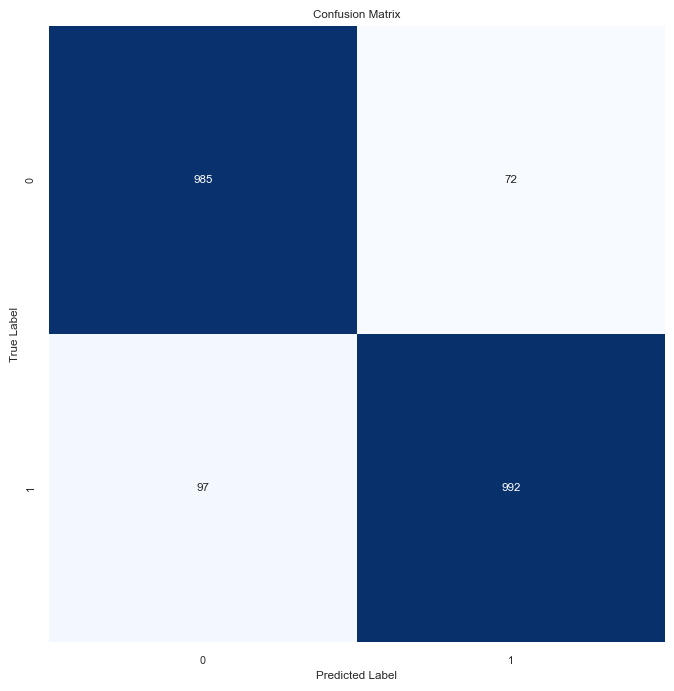

In [602]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusionMat, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=model_lgb.classes_, yticklabels=model_lgb.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.utils import resample

current_features = ['OT', 'pass_yards', 'pass_touchdowns', 'interceptions',
                    'sacks', 'pass_yards_per_attempt',
                    'pass_completion_ratio', 'Rate', 'rush_yards_per_attempt',
                    'rush_touchdowns', 'punts', 'time_of_possession', 'extra_points_ratio',
                    'field_goal_ratio', 'fourth_down_ratio', 'third_down_ratio', 'points_allowed']

# Número de muestras a generar mediante bootstrapping
n_samples = 100

# Crear y entrenar el modelo GBM usando bootstraping
accuracy_scores = []
confusion_matrices = []
classification_reports = []

for _ in range(n_samples):
    # Muestrear con reemplazo los conjuntos de entrenamiento y prueba
    X_train_sample, y_train_sample = resample(X_train[current_features], y_train, random_state=np.random.randint(1000))
    X_test_sample, y_test_sample = resample(X_test[current_features], y_test, random_state=np.random.randint(1000))
    
    # Crear y entrenar el modelo GBM
    model_gbm = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.5, max_depth=3, random_state=101)
    model_gbm.fit(X_train_sample, y_train_sample)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model_gbm.predict(X_test_sample)

    # Calcular la precisión del modelo y guardarla
    accuracy = accuracy_score(y_test_sample, y_pred)
    accuracy_scores.append(accuracy)

    # Guardar la matriz de confusión
    confusion_matrices.append(confusion_matrix(y_test_sample, y_pred))

    # Guardar el informe de clasificación
    classification_reports.append(classification_report(y_test_sample, y_pred))

# Calcular la precisión promedio
average_accuracy = np.mean(accuracy_scores)
print(f'Average Accuracy with Bootstrapping: {average_accuracy}\n')

# Calcular la matriz de confusión promedio
average_confusion_matrix = np.mean(confusion_matrices, axis=0)
print(f'Average Confusion Matrix:\n{average_confusion_matrix}\n')

# Imprimir el informe de clasificación promedio
print("Average Classification Report:")
print("\n".join(classification_reports[:1]))

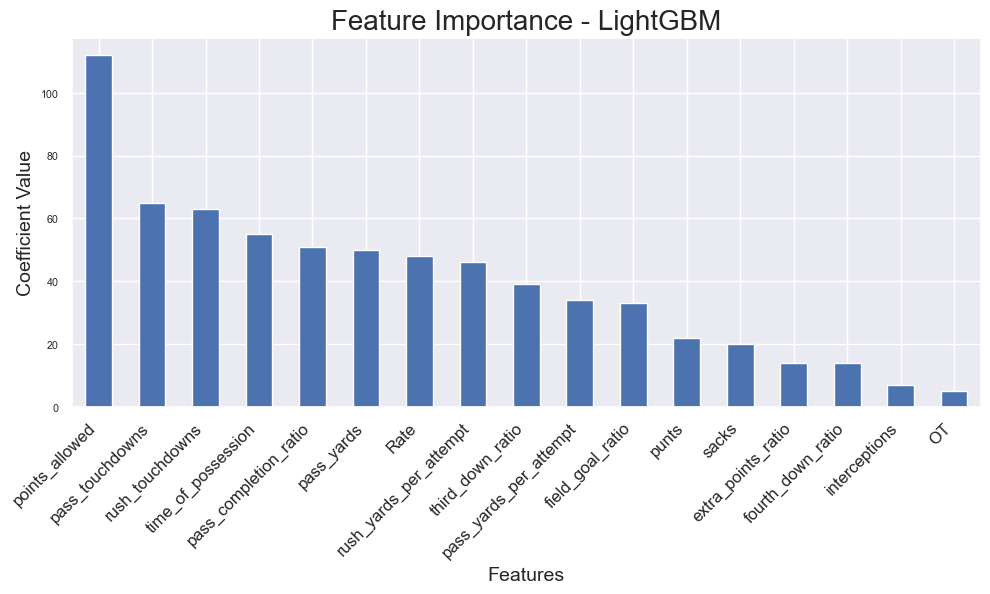

In [592]:
# Obtener los coeficientes del modelo y asociarlos con sus respectivas características
feature_importance = pd.DataFrame(model_lgb.feature_importances_, 
                                  index=current_features, 
                                  columns=['coefficient']).sort_values(by='coefficient', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
ax = feature_importance['coefficient'].plot(kind='bar')
plt.title('Feature Importance - LightGBM', fontsize=20)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Coefficient Value', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

#### Predict

In [673]:
#Inferecia con la temporada 2023
y_pred_2023 = model_lgb.predict(nfl_df_2023[current_features])

#Observamos las predicciones
print(y_pred_2023)

[0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0
 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1
 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0
 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1
 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1
 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1
 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1
 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1
 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0
 1 1 1 1 1 1 0 0 1 0 0 0 

In [674]:
# Añade las predicciones al DataFrame de la temporada 2023
nfl_df_2023['Prediction_LGB'] = y_pred_2023

#Vemos como coinciden las predicciones con los resultados reales
nfl_df_2023[['Team', 'target', 'Prediction_LGB']]

,Team,target,Prediction_LGB
0,CRD,0,0
1,CRD,0,0
2,CRD,1,1
3,CRD,0,0
4,CRD,0,0
...,...,...,...
565,WAS,0,0
566,WAS,0,0
567,WAS,0,0
568,WAS,0,0


In [675]:
#Calculamos la precision del modelo
accuracy = accuracy_score(nfl_df_2023['target'], y_pred_2023)
print(f'Accuracy with inference: {accuracy}\n')

# Mostrar la matriz de confusión
confusionMat = confusion_matrix(nfl_df_2023['target'], y_pred_2023)
print(f'Confusion Matrix:\n{confusionMat}\n')

# Mostrar el informe de clasificación
report = classification_report(nfl_df_2023['target'], y_pred_2023)
print(f'Classification Report:\n{report}\n')

Accuracy with inference: 0.9070175438596492

Confusion Matrix:
[[256  29]
 [ 24 261]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       285
           1       0.90      0.92      0.91       285

    accuracy                           0.91       570
   macro avg       0.91      0.91      0.91       570
weighted avg       0.91      0.91      0.91       570




#### Predict Prob

In [676]:
# Obtener las probabilidades predichas
y_pred_proba_2023 = model_lgb.predict_proba(nfl_df_2023[current_features])

#Inferecia con la temporada 2023
y_pred_2023 = model_lgb.predict(nfl_df_2023[current_features])

# Verificar las probabilidades para la clase 1 (asumiendo que 1 es la segunda clase)
proba_class_1 = y_pred_proba_2023[:, 1]

# Convertir a formato de punto flotante sin notación científica
proba_class_1_no_sci = [f"{prob:.10f}" for prob in proba_class_1]

# Mostrar las probabilidades predichas
print(f'Predicted probabilities for class 1:\n{proba_class_1_no_sci}\n')

# Verificar el umbral de clasificación
threshold = 0.5
y_pred_2023_threshold = (proba_class_1 >= threshold).astype(int)

# Mostrar los valores predichos con el umbral de 0.5
print(f'Predictions with threshold {threshold}:\n{y_pred_2023_threshold}\n')

# Comparar con los valores originales predichos
#print(f'Original Predictions:\n{y_pred_2023}\n')

Predicted probabilities for class 1:
['0.0040839568', '0.2790621690', '0.9999066494', '0.0010939679', '0.0012013230', '0.0005247116', '0.0034783739', '0.1270402083', '0.0001102217', '0.7525771040', '0.7075739352', '0.0000067430', '0.9999695925', '0.0002617593', '0.0083923912', '0.9872317590', '0.5118643015', '0.9998268163', '0.4722428493', '0.0026891266', '0.0000744633', '0.9751000941', '0.1964212077', '0.9692360919', '0.0064417819', '0.0457976623', '0.8040080131', '0.9688460555', '0.9821602034', '0.1572333700', '0.8751156910', '0.9999276387', '0.0000182946', '0.0000802804', '0.9999704591', '0.9941589972', '0.0159798880', '0.9999984450', '0.0763523895', '0.7334854143', '0.9999999999', '0.9815100067', '0.9999999989', '0.1085745450', '0.9978891544', '0.9999154663', '0.1056451549', '0.9999909499', '0.9987528555', '0.9999997961', '0.1787266059', '0.9999999662', '0.0670700878', '0.0528873582', '0.9999999994', '0.9999998064', '0.9999995818', '0.0494397359', '0.9622137104', '0.0089804253', '0

In [677]:
# Añade las predicciones al DataFrame de la temporada 2023
nfl_df_2023['LGB'] = proba_class_1_no_sci

#Vemos como coinciden las predicciones con los resultados reales
nfl_df_2023[['Team', 'target', 'Prediction_LGB', 'LGB']]

,Team,target,Prediction_LGB,LGB
0,CRD,0,0,0.0040839568
1,CRD,0,0,0.2790621690
2,CRD,1,1,0.9999066494
3,CRD,0,0,0.0010939679
4,CRD,0,0,0.0012013230
...,...,...,...,...
565,WAS,0,0,0.0000164278
566,WAS,0,0,0.0197551389
567,WAS,0,0,0.0336586562
568,WAS,0,0,0.0055649935


### MLPClassifier (Red Neuronal)

In [341]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

current_features=['OT', 'pass_yards', 'pass_touchdowns', 'interceptions',
       'sacks','pass_yards_per_attempt', 'pass_completion_ratio', 'Rate', 'rush_yards_per_attempt',
       'rush_touchdowns', 'punts', 'time_of_possession', 'extra_points_ratio',
       'field_goal_ratio', 'fourth_down_ratio', 'third_down_ratio', 'points_allowed']

# Crear el modelo MLPClassifier
MLP = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(128, 64), activation='tanh', solver='adam', 
                  learning_rate_init=0.001, max_iter=15, batch_size= 128, 
                  early_stopping= True, random_state=42)
)

# Aplicar validación cruzada
cv_scores = cross_val_score(MLP, X_train[current_features], y_train, cv=5, scoring='accuracy')

# Imprimir las puntuaciones de validación cruzada
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {np.mean(cv_scores)}\n')

# Entrenar el modelo
MLP.fit(X_train[current_features], y_train)

# Calcular la precisión del modelo en el conjunto de entrenamiento
train_accuracy = MLP.score(X_train[current_features], y_train)
print(f'Accuracy on train data: {train_accuracy}\n')

# Realizar predicciones en el conjunto de prueba
y_pred = MLP.predict(X_test[current_features])

# Calcular la precisión del modelo en el conjunto de prueba
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test data: {test_accuracy}\n')

# Mostrar la matriz de confusión
confusionMat = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusionMat}\n')

# Mostrar el informe de clasificación
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}\n')

Cross-validation scores: [0.92836342 0.9167152  0.91783217 0.91375291 0.90792541]
Mean cross-validation score: 0.9169178230040199

Accuracy on train data: 0.9250757399207644

Accuracy on test data: 0.9245107176141659

Confusion Matrix:
[[1000   57]
 [ 105  984]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1057
           1       0.95      0.90      0.92      1089

    accuracy                           0.92      2146
   macro avg       0.93      0.92      0.92      2146
weighted avg       0.93      0.92      0.92      2146




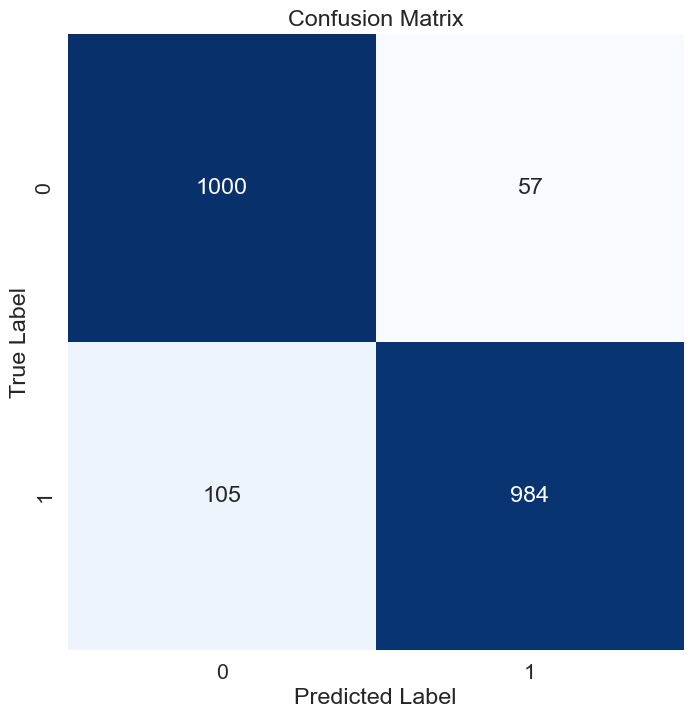

In [270]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusionMat, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
            xticklabels=MLP.classes_, yticklabels=MLP.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

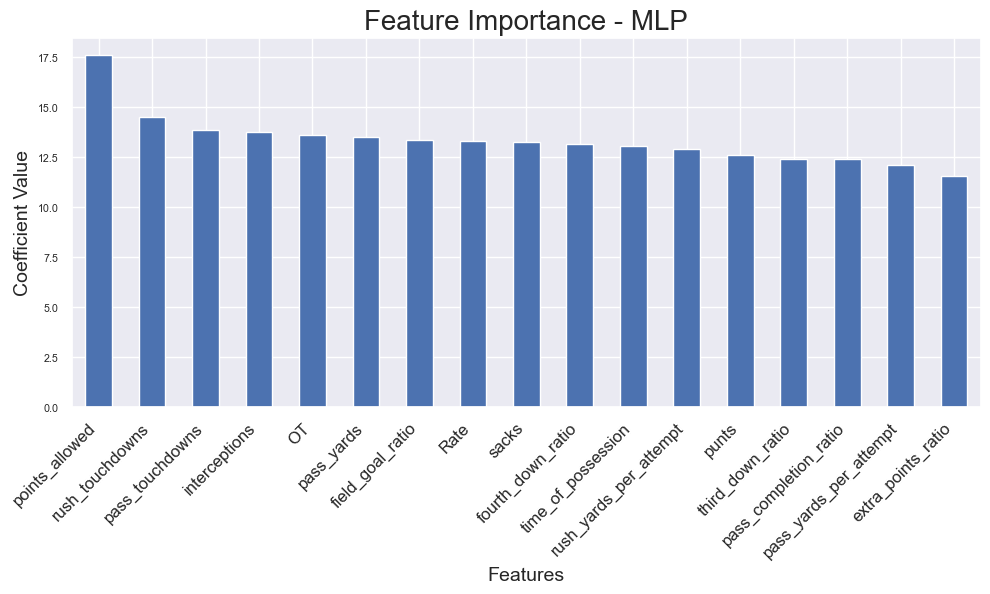

In [611]:
# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
ax = features_df.set_index('Feature')['Importance'].plot(kind='bar')
plt.title('Feature Importance - MLP', fontsize=20)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Coefficient Value', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

In [610]:
# Obtener los coeficientes de la primera capa oculta
mlp_model = MLP.named_steps['mlpclassifier']
coefs = mlp_model.coefs_[0]

# Calcular la importancia de las características como la suma de los valores absolutos de los coeficientes
feature_importances = np.sum(np.abs(coefs), axis=1)

# Crear un DataFrame para visualizar mejor las importancias
features_df = pd.DataFrame({
    'Feature': current_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(features_df)

                   Feature  Importance
16          points_allowed   17.592828
9          rush_touchdowns   14.520713
2          pass_touchdowns   13.861116
3            interceptions   13.760409
0                       OT   13.625741
1               pass_yards   13.515531
13        field_goal_ratio   13.330117
7                     Rate   13.291302
4                    sacks   13.267031
14       fourth_down_ratio   13.159434
11      time_of_possession   13.061307
8   rush_yards_per_attempt   12.907187
10                   punts   12.600165
15        third_down_ratio   12.382703
6    pass_completion_ratio   12.375131
5   pass_yards_per_attempt   12.111703
12      extra_points_ratio   11.571958


#### Predict

In [678]:
#Inferecia con la temporada 2023
y_pred_2023 = MLP.predict(nfl_df_2023[current_features])

#Observamos las predicciones
print(y_pred_2023)

[0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0
 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0
 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1
 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1
 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1
 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1
 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1
 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1
 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0
 0 1 1 0 1 1 0 0 0 0 0 0 

In [679]:
# Añade las predicciones al DataFrame de la temporada 2023
nfl_df_2023['Prediction_MLP'] = y_pred_2023

#Vemos como coinciden las predicciones con los resultados reales
nfl_df_2023[['Team', 'target', 'Prediction_MLP']]

,Team,target,Prediction_MLP
0,CRD,0,0
1,CRD,0,0
2,CRD,1,1
3,CRD,0,0
4,CRD,0,0
...,...,...,...
565,WAS,0,0
566,WAS,0,0
567,WAS,0,0
568,WAS,0,0


In [696]:
#Calculamos la precision del modelo
accuracy = accuracy_score(nfl_df_2023['target'], y_pred_2023)
print(f'Accuracy with Best Model: {accuracy}\n')

# Mostrar la matriz de confusión
confusionMat = confusion_matrix(nfl_df_2023['target'], y_pred_2023)
print(f'Confusion Matrix:\n{confusionMat}\n')

# Mostrar el informe de clasificación
report = classification_report(nfl_df_2023['target'], y_pred_2023)
print(f'Classification Report:\n{report}\n')

Accuracy with Best Model: 0.9035087719298246

Confusion Matrix:
[[256  29]
 [ 26 259]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       285
           1       0.90      0.91      0.90       285

    accuracy                           0.90       570
   macro avg       0.90      0.90      0.90       570
weighted avg       0.90      0.90      0.90       570




In [681]:
# Obtener las probabilidades predichas
y_pred_proba_2023 = MLP.predict_proba(nfl_df_2023[current_features])

#Inferecia con la temporada 2023
y_pred_2023 = MLP.predict(nfl_df_2023[current_features])

# Verificar las probabilidades para la clase 1 (asumiendo que 1 es la segunda clase)
proba_class_1 = y_pred_proba_2023[:, 1]

# Convertir a formato de punto flotante sin notación científica
proba_class_1_no_sci = [f"{prob:.10f}" for prob in proba_class_1]

# Mostrar las probabilidades predichas
print(f'Predicted probabilities for class 1:\n{proba_class_1_no_sci}\n')
print(len(proba_class_1_no_sci))

# Verificar el umbral de clasificación
threshold = 0.5
y_pred_2023_threshold = (proba_class_1 >= threshold).astype(int)

# Mostrar los valores predichos con el umbral de 0.5
print(f'Predictions with threshold {threshold}:\n{y_pred_2023_threshold}\n')

# Comparar con los valores originales predichos
print(f'Original Predictions:\n{y_pred_2023}\n')

Predicted probabilities for class 1:
['0.0097472498', '0.1199551526', '0.9929046573', '0.0024706204', '0.0007751305', '0.0009668472', '0.0193064556', '0.0523373621', '0.0001869158', '0.4281137961', '0.5758023568', '0.0001185333', '0.9998095876', '0.0008348282', '0.0246038118', '0.9420360655', '0.7157318375', '0.9991605684', '0.5984240913', '0.0019699099', '0.0004445320', '0.9523678807', '0.1866752742', '0.9333684263', '0.0179121163', '0.0051168680', '0.8925504490', '0.9619249248', '0.9886491923', '0.0336043890', '0.8108914354', '0.9984477016', '0.0003850920', '0.0001178671', '0.9993496477', '0.8900807809', '0.1121153191', '0.9998873554', '0.1786665971', '0.6497042212', '0.9999679318', '0.9600086478', '0.9999511863', '0.0093527712', '0.9994681132', '0.9978999372', '0.2236942257', '0.9994788501', '0.9974822121', '0.9998512770', '0.3156390986', '0.9999536277', '0.1640891163', '0.0357525011', '0.9999600189', '0.9999377915', '0.9998772090', '0.0903314421', '0.9648697237', '0.1293752098', '0

In [682]:
# Añade las predicciones al DataFrame de la temporada 2023
nfl_df_2023['MLP'] = proba_class_1_no_sci

#Vemos como coinciden las predicciones con los resultados reales
nfl_df_2023[['Team', 'target', 'Prediction_MLP', 'MLP']].head(10)

,Team,target,Prediction_MLP,MLP
0,CRD,0,0,0.0097472498
1,CRD,0,0,0.1199551526
2,CRD,1,1,0.9929046573
3,CRD,0,0,0.0024706204
4,CRD,0,0,0.0007751305
5,CRD,0,0,0.0009668472
6,CRD,0,0,0.0193064556
7,CRD,0,0,0.0523373621
8,CRD,0,0,0.0001869158
9,CRD,1,0,0.4281137961


### RED NEURONAL

In [624]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

current_features=[ 'OT', 'pass_yards', 'pass_touchdowns', 'interceptions',
       'sacks', 'pass_yards_per_attempt',
       'pass_completion_ratio', 'Rate', 'rush_yards_per_attempt',
       'rush_touchdowns', 'punts', 'time_of_possession', 'extra_points_ratio',
       'field_goal_ratio', 'fourth_down_ratio', 'third_down_ratio', 'points_allowed']

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[current_features])
X_test_scaled = scaler.transform(X_test[current_features])

# Definir el modelo Sequential
NeuralNet = Sequential([
    Dense(128, activation='tanh', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.1),
    Dense(64, activation='tanh'),
    Dropout(0.1),
    Dense(3, activation='softmax')
])

# Compilar el modelo
optimizer = Adam(learning_rate=0.001)
NeuralNet.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = NeuralNet.fit(X_train_scaled, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8105 - loss: 0.4920 - val_accuracy: 0.9051 - val_loss: 0.2410
Epoch 2/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9104 - loss: 0.2100 - val_accuracy: 0.9115 - val_loss: 0.2189
Epoch 3/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9129 - loss: 0.1954 - val_accuracy: 0.9004 - val_loss: 0.2221
Epoch 4/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9229 - loss: 0.1894 - val_accuracy: 0.9039 - val_loss: 0.2168
Epoch 5/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9201 - loss: 0.1915 - val_accuracy: 0.9074 - val_loss: 0.2190
Epoch 6/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9197 - loss: 0.1872 - val_accuracy: 0.9080 - val_loss: 0.2152
Epoch 7/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9252 - loss: 0.1789 - val_accuracy: 0.9086 - val_loss: 0.2111
Epoch 8/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9223 - loss: 0.1818 - val_accuracy: 0.

In [633]:
# Si prefieres guardar en el formato TensorFlow SavedModel (recomendado en las versiones más nuevas de TensorFlow)
NeuralNet.save('NeuralNet.keras')

In [635]:
# Otra opción es guardar la arquitectura y los pesos por separado.
#Guardar la arquitectura (estructura) del modelo a un archivo JSON
model_json = NeuralNet.to_json()
with open("NeuralNet.json", "w") as json_file:
    json_file.write(model_json)

# Guardar solo los pesos del modelo
NeuralNet.save_weights("NeuralNet.weights.h5")

In [637]:
from tensorflow.keras.models import load_model

# Cargar el modelo completo
NeuralNet = load_model('NeuralNet.keras')


# Evaluar el modelo en el conjunto de entrenamiento
train_loss, train_accuracy = NeuralNet.evaluate(X_train_scaled, y_train)
print("Accuracy on train data:", train_accuracy)

# Evaluar el modelo en el conjunto de prueba para obtener la pérdida y precisión
test_loss, test_accuracy = NeuralNet.evaluate(X_test_scaled, y_test, verbose=0)
print("Accuracy on test data:", test_accuracy)

# Predicción de las etiquetas
y_pred_prob = NeuralNet.predict(X_test_scaled)
print(y_pred_prob)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

print("Matriz de Confusión:")
print(conf_matrix)

269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9429 - loss: 0.1418
Accuracy on train data: 0.9360288977622986
Accuracy on test data: 0.9217148423194885
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[9.2999524e-01 7.0004784e-02 3.8963535e-08]
 [9.7061878e-01 2.9379677e-02 1.4731462e-06]
 [4.3766004e-01 5.6233799e-01 2.0430796e-06]
 ...
 [2.8554001e-01 7.1437484e-01 8.5104992e-05]
 [3.6939880e-01 6.3055205e-01 4.9132923e-05]
 [8.2754219e-01 1.7245592e-01 1.8812337e-06]]
Matriz de Confusión:
[[1008   49]
 [ 119  970]]


In [638]:
# Mostrar el informe de clasificación
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}\n')

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1057
           1       0.95      0.89      0.92      1089

    accuracy                           0.92      2146
   macro avg       0.92      0.92      0.92      2146
weighted avg       0.92      0.92      0.92      2146




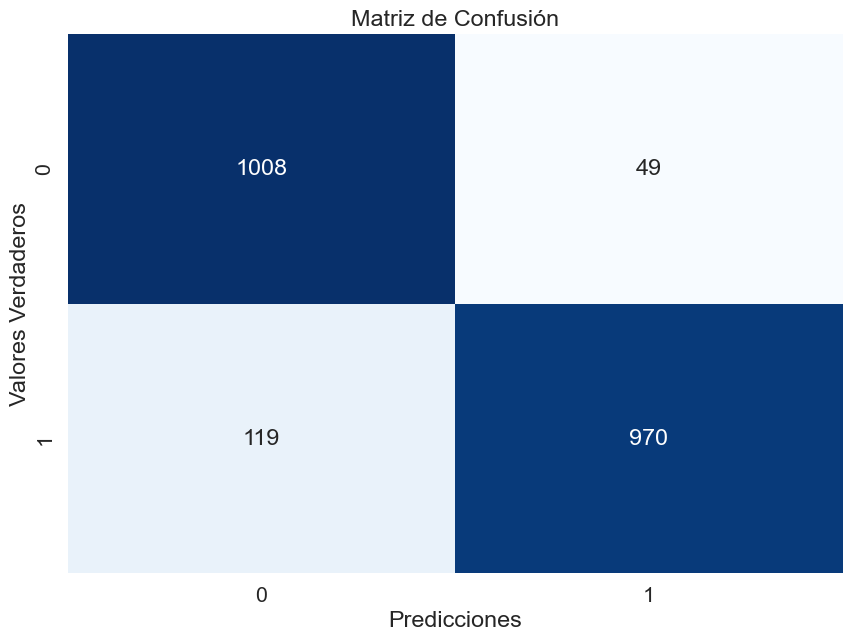

In [639]:
# Configuración de la visualización
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)  # Ajusta el tamaño de la fuente

# Suponiendo que y_test y y_pred están ya definidos
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()

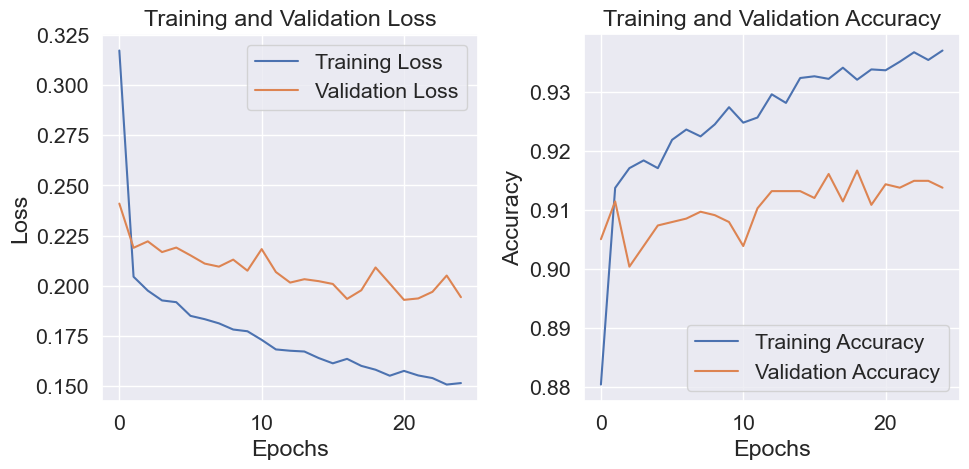

In [640]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Análisis del Gráfico de Pérdida (Loss):
Pérdida de Entrenamiento vs. Pérdida de Validación: Se puede observar que la pérdida de entrenamiento disminuye rápidamente en las primeras épocas y luego se estabiliza, manteniéndose en un nivel bajo y relativamente constante. Por otro lado, la pérdida de validación también disminuye y sigue de cerca a la pérdida de entrenamiento, lo cual es una buena señal. No hay un aumento notable en la pérdida de validación en comparación con la pérdida de entrenamiento, lo que sugeriría sobreajuste.

Análisis del Gráfico de Precisión (Accuracy):
Precisión de Entrenamiento vs. Precisión de Validación: La precisión de entrenamiento aumenta con las épocas y parece estar todavía en una tendencia ascendente después de la última época, lo que indica que el modelo podría continuar mejorando con más épocas. La precisión de validación, aunque es volátil al principio, se estabiliza y sigue una tendencia ascendente. Si bien no coincide exactamente con la precisión de entrenamiento, su tendencia es similar y no hay evidencia de un estancamiento o disminución en la precisión de validación, lo cual podría indicar sobreajuste.

Conclusión:
Basándonos en estos gráficos, no parece haber evidencia clara de sobreajuste. El modelo está aprendiendo y generalizando bien hasta este punto, ya que la pérdida de validación no aumenta y la precisión de validación no disminuye ni se estanca significativamente en comparación con la precisión de entrenamiento.

#### Predict Prob

In [698]:
scaler = StandardScaler()
df = scaler.fit_transform(nfl_df_2023[current_features])

# Inferencia con la temporada 2023
y_pred_2023 = NeuralNet.predict(df)
print(len(y_pred_2023))

# Observamos las predicciones
print(y_pred_2023)

# # Asegúrate de que y_pred_2023 es un array de NumPy
y_pred_2023 = np.array(y_pred_2023)

# Convertir cada elemento a un float antes de formatearlo
y_pred_2023_no_sci = [f"{float(prob):.10f}" for prob in y_pred_2023[:, 1]]

print(f'Predicted probabilities for class 1 (without scientific notation):\n{y_pred_2023_no_sci}\n')

# Verificar el umbral de clasificación
threshold = 0.5
y_pred_2023_threshold = (proba_class_1 >= threshold).astype(int)

# Mostrar los valores predichos con el umbral de 0.5
print(f'Predictions with threshold {threshold}:\n{y_pred_2023_threshold}\n')

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
570
[[9.5103467e-01 4.8961271e-02 4.1129397e-06]
 [7.9760957e-01 2.0238993e-01 5.1992743e-07]
 [4.3789577e-04 9.9955469e-01 7.3753122e-06]
 ...
 [9.0865916e-01 9.1339439e-02 1.3598855e-06]
 [9.8697144e-01 1.3026115e-02 2.4511528e-06]
 [9.9800080e-01 1.9972285e-03 1.9000831e-06]]
Predicted probabilities for class 1 (without scientific notation):
['0.0489612706', '0.2023899257', '0.9995546937', '0.0069463798', '0.0008077965', '0.0012800093', '0.0123075014', '0.0581304766', '0.0002634786', '0.4067329764', '0.5032380819', '0.0001068749', '0.9999438524', '0.0015073370', '0.0135248508', '0.9743301868', '0.5448936224', '0.9992513061', '0.5711946487', '0.0014283278', '0.0007036327', '0.9576674700', '0.0772818476', '0.9235528111', '0.0237704832', '0.0090201693', '0.7469490170', '0.9957880378', '0.9987879395', '0.0120896641', '0.3473223746', '0.9998487234', '0.0010977167', '0.0007835319', '0.9999375343', '0.8492258787', '0.0774195865', '0.9999003410', '0.1

In [699]:
# Añade las predicciones al DataFrame de la temporada 2023
nfl_df_2023['NeuralNet'] = y_pred_2023_no_sci

#Vemos como coinciden las predicciones con los resultados reales
nfl_df_2023[['Team', 'target',  'NeuralNet']].head(20)

,Team,target,NeuralNet
0,CRD,0,0.0489612706
1,CRD,0,0.2023899257
2,CRD,1,0.9995546937
3,CRD,0,0.0069463798
4,CRD,0,0.0008077965
5,CRD,0,0.0012800093
6,CRD,0,0.0123075014
7,CRD,0,0.0581304766
8,CRD,0,0.0002634786
9,CRD,1,0.4067329764


#### Predict

In [700]:
# Para un problema de clasificación, convertir las probabilidades en etiquetas predichas
y_pred_2023 = np.argmax(y_pred_2023, axis=1)
print(y_pred_2023)

[0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0
 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1
 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0
 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1
 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 0 1
 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1
 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1
 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0
 0 1 1 0 1 1 0 0 0 0 0 0 

In [701]:
# Añade las predicciones al DataFrame de la temporada 2023
nfl_df_2023['Prediction_NeuralNet'] = y_pred_2023

#Vemos como coinciden las predicciones con los resultados reales
nfl_df_2023[['Team', 'target', 'Prediction_NeuralNet']]

,Team,target,Prediction_NeuralNet
0,CRD,0,0
1,CRD,0,0
2,CRD,1,1
3,CRD,0,0
4,CRD,0,0
...,...,...,...
565,WAS,0,0
566,WAS,0,0
567,WAS,0,0
568,WAS,0,0


In [702]:
#Calculamos la precision del modelo
accuracy = accuracy_score(nfl_df_2023['target'], y_pred_2023)
print(f'Accuracy with Best Model: {accuracy}\n')

# Mostrar la matriz de confusión
confusionMat = confusion_matrix(nfl_df_2023['target'], y_pred_2023)
print(f'Confusion Matrix:\n{confusionMat}\n')

# Mostrar el informe de clasificación
report = classification_report(nfl_df_2023['target'], y_pred_2023)
print(f'Classification Report:\n{report}\n')

Accuracy with Best Model: 0.9017543859649123

Confusion Matrix:
[[265  20]
 [ 36 249]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       285
           1       0.93      0.87      0.90       285

    accuracy                           0.90       570
   macro avg       0.90      0.90      0.90       570
weighted avg       0.90      0.90      0.90       570




## RESULTADOS INFERENCIA SIN PROB

In [683]:
nfl_df_2023.head()

,Season,Team,Date,target,OT,points_scored,points_allowed,pass_yards,pass_touchdowns,interceptions,...,Prediction_ArbolDecision,ArbolDecision,Prediction_RandomForest,RandomForest,Prediction_XGB,XGB,Prediction_LGB,LGB,Prediction_MLP,MLP
0,2023,CRD,2023-09-10,0,0,16,20,114,0,0,...,0,0.0000000000,0,0.2012855069,0,0.0937144905,0,0.0040839568,0,0.0097472498
1,2023,CRD,2023-09-17,0,0,28,31,228,1,0,...,1,0.7500000000,1,0.5831849110,0,0.3587569296,0,0.2790621690,0,0.1199551526
2,2023,CRD,2023-09-24,1,0,28,16,178,1,0,...,1,1.0000000000,1,0.9667441860,1,0.9961746931,1,0.9999066494,1,0.9929046573
3,2023,CRD,2023-10-01,0,0,16,35,257,2,0,...,0,0.0000000000,0,0.1828869697,0,0.0253628232,0,0.0010939679,0,0.0024706204
4,2023,CRD,2023-10-08,0,0,20,34,152,2,2,...,0,0.0000000000,0,0.0056351824,0,0.0031285048,0,0.0012013230,0,0.0007751305


In [724]:
# Especificar las columnas que deseas seleccionar
columns_to_select = ['Date', 'Team', 'Season', 'target', 'Prediction_RegLog', 'Prediction_ArbolDecision', 'Prediction_RandomForest', 
                     'Prediction_XGB', 'Prediction_LGB', 'Prediction_MLP', 
                     'Prediction_NeuralNet']

# Crear un nuevo DataFrame con las columnas seleccionadas
df_inferencia = nfl_df_2023[columns_to_select].copy()

df_inferencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      570 non-null    object
 1   Team                      570 non-null    object
 2   Season                    570 non-null    int64 
 3   target                    570 non-null    int64 
 4   Prediction_RegLog         570 non-null    int64 
 5   Prediction_ArbolDecision  570 non-null    int64 
 6   Prediction_RandomForest   570 non-null    int64 
 7   Prediction_XGB            570 non-null    int32 
 8   Prediction_LGB            570 non-null    int64 
 9   Prediction_MLP            570 non-null    int64 
 10  Prediction_NeuralNet      570 non-null    int64 
dtypes: int32(1), int64(8), object(2)
memory usage: 46.9+ KB


In [725]:
df_inferencia['Date'] = pd.to_datetime(df_inferencia['Date'])

In [726]:
df_inferencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      570 non-null    datetime64[ns]
 1   Team                      570 non-null    object        
 2   Season                    570 non-null    int64         
 3   target                    570 non-null    int64         
 4   Prediction_RegLog         570 non-null    int64         
 5   Prediction_ArbolDecision  570 non-null    int64         
 6   Prediction_RandomForest   570 non-null    int64         
 7   Prediction_XGB            570 non-null    int32         
 8   Prediction_LGB            570 non-null    int64         
 9   Prediction_MLP            570 non-null    int64         
 10  Prediction_NeuralNet      570 non-null    int64         
dtypes: datetime64[ns](1), int32(1), int64(8), object(1)
memory usage: 46.9+ KB


In [727]:
df_inferencia.head()

,Date,Team,Season,target,Prediction_RegLog,Prediction_ArbolDecision,Prediction_RandomForest,Prediction_XGB,Prediction_LGB,Prediction_MLP,Prediction_NeuralNet
0,2023-09-10,CRD,2023,0,0,0,0,0,0,0,0
1,2023-09-17,CRD,2023,0,0,1,1,0,0,0,0
2,2023-09-24,CRD,2023,1,1,1,1,1,1,1,1
3,2023-10-01,CRD,2023,0,0,0,0,0,0,0,0
4,2023-10-08,CRD,2023,0,0,0,0,0,0,0,0


In [736]:
#Cambiar el año de la fecha de las observaciones con date = 2023-01-13. Cambiar 2023 por 2024
df_inferencia.loc[df_inferencia['Date'] == '2023-01-06', 'Date'] = df_inferencia.loc[df_inferencia['Date'] == '2023-01-06', 'Date'] + pd.DateOffset(years=1)
df_inferencia.loc[df_inferencia['Date'] == '2023-01-07', 'Date'] = df_inferencia.loc[df_inferencia['Date'] == '2023-01-07', 'Date'] + pd.DateOffset(years=1)
df_inferencia.loc[df_inferencia['Date'] == '2023-01-13', 'Date'] = df_inferencia.loc[df_inferencia['Date'] == '2023-01-13', 'Date'] + pd.DateOffset(years=1)
df_inferencia.loc[df_inferencia['Date'] == '2023-01-14', 'Date'] = df_inferencia.loc[df_inferencia['Date'] == '2023-01-14', 'Date'] + pd.DateOffset(years=1)
df_inferencia.loc[df_inferencia['Date'] == '2023-01-15', 'Date'] = df_inferencia.loc[df_inferencia['Date'] == '2023-01-15', 'Date'] + pd.DateOffset(years=1)
df_inferencia.loc[df_inferencia['Date'] == '2023-01-20', 'Date'] = df_inferencia.loc[df_inferencia['Date'] == '2023-01-20', 'Date'] + pd.DateOffset(years=1)
df_inferencia.loc[df_inferencia['Date'] == '2023-01-21', 'Date'] = df_inferencia.loc[df_inferencia['Date'] == '2023-01-21', 'Date'] + pd.DateOffset(years=1)
df_inferencia.loc[df_inferencia['Date'] == '2023-01-28', 'Date'] = df_inferencia.loc[df_inferencia['Date'] == '2023-01-28', 'Date'] + pd.DateOffset(years=1)
df_inferencia.loc[df_inferencia['Date'] == '2023-02-11', 'Date'] = df_inferencia.loc[df_inferencia['Date'] == '2023-02-11', 'Date'] + pd.DateOffset(years=1)

### TEMPORADA REGULAR

In [743]:
# Crear dataframe con las observaciones que tenga date <= 2024-01-07
df_regular = df_inferencia[df_inferencia['Date'] <= '2024-01-07']

In [686]:
# Modificamos la función para calcular los registros de victorias/derrotas y devolver un DataFrame ordenado
# por el record real desde el equipo con más victorias al equipo con menos victorias.

def calculate_records(df, prediction_cols):
    # Crear un DataFrame vacío para almacenar los registros
    records_df = pd.DataFrame(index=df['Team'].unique())

    # Calcular los registros para los resultados reales
    real_records = df.groupby('Team')['target'].value_counts().unstack(fill_value=0)
    records_df['Real'] = real_records.apply(lambda row: f"{row[1]}-{row[0]}", axis=1)
    
    # Calcular los registros para cada modelo de predicción
    for col in prediction_cols:
        model_records = df.groupby('Team')[col].value_counts().unstack(fill_value=0)
        records_df[col] = model_records.apply(lambda row: f"{row[1]}-{row[0]}", axis=1)
        
    # Ordenar el DataFrame por el record real, de más victorias a menos
    records_df['Wins'] = real_records[1]  # Columna temporal para ordenar
    records_df.sort_values('Wins', ascending=False, inplace=True)
    records_df.drop(columns='Wins', inplace=True)  # Eliminar la columna temporal

    return records_df

# Las columnas de predicción permanecen iguales.
prediction_cols = [
    'Prediction_RegLog', 'Prediction_ArbolDecision','Prediction_RandomForest','Prediction_XGB', 
    'Prediction_LGB', 'Prediction_MLP', 'Prediction_NeuralNet'
]


In [744]:
# Suponiendo que 'df_inferencia' es nuestro DataFrame de entrada, calcularíamos los registros ordenados de esta manera:
df_records_regular = calculate_records(df_regular, prediction_cols)

In [750]:
df_records_regular.head()

,Real,Prediction_RegLog,Prediction_ArbolDecision,Prediction_RandomForest,Prediction_XGB,Prediction_LGB,Prediction_MLP,Prediction_NeuralNet
RAV,13-4,12-5,12-5,12-5,12-5,12-5,12-5,12-5
DAL,12-5,14-3,13-4,11-6,12-5,12-5,14-3,12-5
DET,12-5,11-6,11-6,11-6,11-6,11-6,11-6,11-6
SFO,12-5,13-4,15-2,13-4,13-4,13-4,13-4,13-4
KAN,11-6,12-5,13-4,12-5,13-4,12-5,11-6,9-8


In [751]:
df_records_regular.tail()

,Real,Prediction_RegLog,Prediction_ArbolDecision,Prediction_RandomForest,Prediction_XGB,Prediction_LGB,Prediction_MLP,Prediction_NeuralNet
SDG,5-12,7-10,8-9,6-11,6-11,6-11,6-11,6-11
CRD,4-13,5-12,6-11,6-11,6-11,6-11,5-12,5-12
NWE,4-13,3-14,7-10,6-11,4-13,5-12,3-14,3-14
WAS,4-13,3-14,4-13,3-14,3-14,3-14,3-14,3-14
CAR,2-15,5-12,4-13,3-14,1-16,3-14,5-12,3-14


### PLAY OFF

In [747]:
# Crear dataframe con las observaciones que tenga date > 2024-01-07
df_playoff = df_inferencia[df_inferencia['Date'] > '2024-01-07']

In [748]:
df_records_playoff = calculate_records(df_playoff, prediction_cols)

In [785]:
df_records_playoff

,Real,Prediction_RegLog,Prediction_ArbolDecision,Prediction_RandomForest,Prediction_XGB,Prediction_LGB,Prediction_MLP,Prediction_NeuralNet
KAN,4-0,4-0,3-1,4-0,4-0,3-1,4-0,4-0
DET,2-1,3-0,2-1,2-1,2-1,2-1,2-1,2-1
SFO,2-1,3-0,3-0,1-2,3-0,3-0,3-0,3-0
RAV,1-1,1-1,1-1,1-1,1-1,1-1,1-1,1-1
BUF,1-1,2-0,1-1,2-0,1-1,1-1,1-1,1-1
GNB,1-1,1-1,1-1,1-1,1-1,1-1,1-1,1-1
HTX,1-1,1-1,1-1,1-1,1-1,1-1,1-1,1-1
TAM,1-1,1-1,1-1,1-1,1-1,1-1,1-1,1-1
CLE,0-1,0-1,0-1,0-1,0-1,0-1,0-1,0-1
DAL,0-1,0-1,0-1,0-1,0-1,0-1,0-1,0-1


## RESULTADOS INFERENCIA CON PROB

In [753]:
# Especificar las columnas que deseas seleccionar
columns_to_select = ['Date', 'Team', 'Season', 'points_allowed','target', 'RegLog', 'ArbolDecision', 'RandomForest', 
                     'XGB', 'LGB', 'MLP', 'NeuralNet']

# Crear un nuevo DataFrame con las columnas seleccionadas
df_inferencia_prob = nfl_df_2023[columns_to_select].copy()

df_inferencia_prob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            570 non-null    object
 1   Team            570 non-null    object
 2   Season          570 non-null    int64 
 3   points_allowed  570 non-null    int64 
 4   target          570 non-null    int64 
 5   RegLog          570 non-null    object
 6   ArbolDecision   570 non-null    object
 7   RandomForest    570 non-null    object
 8   XGB             570 non-null    object
 9   LGB             570 non-null    object
 10  MLP             570 non-null    object
 11  NeuralNet       570 non-null    object
dtypes: int64(3), object(9)
memory usage: 53.6+ KB


In [754]:
df_inferencia_prob['RegLog'] = df_inferencia_prob['RegLog'].astype(float)
df_inferencia_prob['ArbolDecision'] = df_inferencia_prob['ArbolDecision'].astype(float)
df_inferencia_prob['RandomForest'] = df_inferencia_prob['RandomForest'].astype(float)
df_inferencia_prob['XGB'] = df_inferencia_prob['XGB'].astype(float)
df_inferencia_prob['LGB'] = df_inferencia_prob['LGB'].astype(float)
df_inferencia_prob['MLP'] = df_inferencia_prob['MLP'].astype(float)
df_inferencia_prob['NeuralNet'] = df_inferencia_prob['NeuralNet'].astype(float)

In [314]:
#df_inferencia_prob.to_csv('C:/Users/terol/OneDrive/Escritorio/TFG/WebScrapping/data/df_resultados.csv', index=False)

In [755]:
df_inferencia_prob.head()

,Date,Team,Season,points_allowed,target,RegLog,ArbolDecision,RandomForest,XGB,LGB,MLP,NeuralNet
0,2023-09-10,CRD,2023,20,0,0.007558,0.000000,0.201286,0.093714,0.004084,0.009747,0.048961
1,2023-09-17,CRD,2023,31,0,0.238532,0.750000,0.583185,0.358757,0.279062,0.119955,0.202390
2,2023-09-24,CRD,2023,16,1,0.997929,1.000000,0.966744,0.996175,0.999907,0.992905,0.999555
3,2023-10-01,CRD,2023,35,0,0.003957,0.000000,0.182887,0.025363,0.001094,0.002471,0.006946
4,2023-10-08,CRD,2023,34,0,0.000466,0.000000,0.005635,0.003129,0.001201,0.000775,0.000808


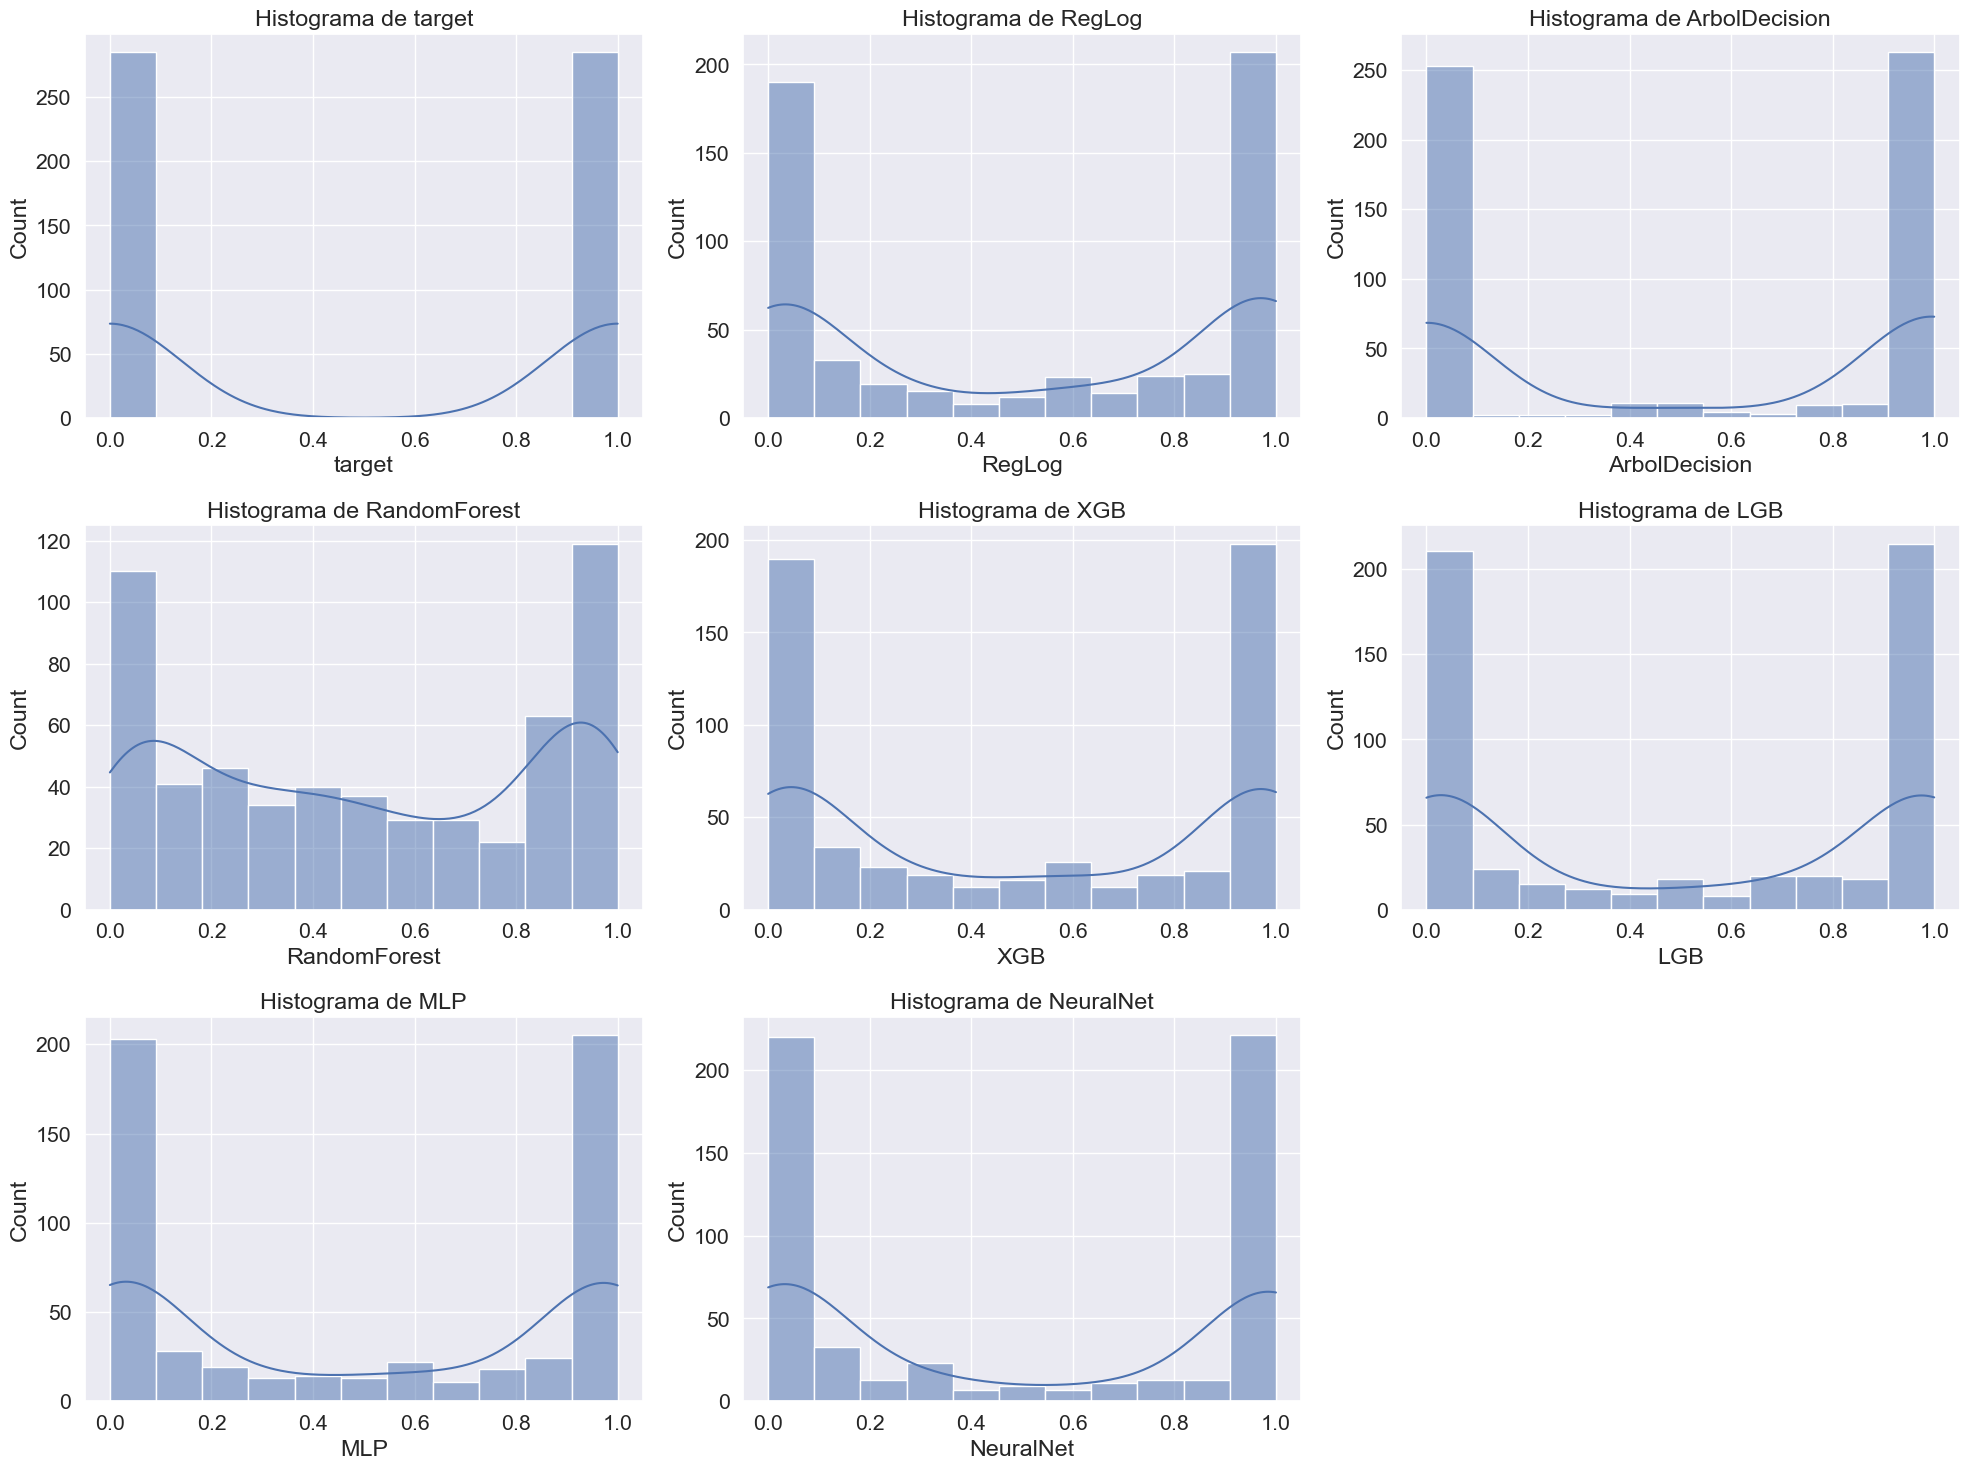

In [756]:
#Seleccionamos las variables numericas
var_num = ['target', 'RegLog', 'ArbolDecision', 'RandomForest','XGB', 'LGB', 'MLP', 'NeuralNet']

# Calcula el número de filas necesario
num_vars = len(var_num)
num_cols = 3
num_rows = (num_vars + num_cols - 1) // num_cols  # Redondea hacia arriba

# Crear una cuadrícula de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Aplanar el array de ejes para facilitar la iteración
axes = axes.flatten()

# Histogramas
for i, var in enumerate(var_num):
    sns.histplot(data=df_inferencia_prob, x=var, kde=True, ax=axes[i])
    axes[i].set_title(f'Histograma de {var}')

# Elimina los ejes vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [757]:
#Seleccionamos las variables numericas
var_num = ['target', 'RegLog', 'ArbolDecision', 'RandomForest','XGB', 'LGB', 'MLP', 'NeuralNet']

numericas = df_inferencia_prob[var_num]
numericas.describe()

,target,RegLog,ArbolDecision,RandomForest,XGB,LGB,MLP,NeuralNet
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000
mean,0.500000,0.512624,0.516446,0.507481,0.499306,0.505339,0.499529,0.486058
std,0.500439,0.431953,0.480781,0.357678,0.422762,0.441400,0.435345,0.448939
min,0.000000,0.000000,0.000000,0.000000,0.000380,0.000001,0.000023,0.000059
25%,0.000000,0.021710,0.000000,0.154460,0.035089,0.014379,0.014668,0.012951
50%,0.500000,0.575484,0.645833,0.482978,0.499115,0.532614,0.518337,0.343980
75%,1.000000,0.987506,1.000000,0.884973,0.983441,0.995468,0.989722,0.998706
max,1.000000,1.000000,1.000000,1.000000,0.999856,1.000000,0.999978,0.999985


In [790]:
from scipy.stats import skew, kurtosis

var_num = ['target', 'RegLog', 'ArbolDecision', 'RandomForest', 'XGB', 'LGB', 'MLP', 'NeuralNet']

# Calcular estadísticas descriptivas
stats = df_inferencia_prob[var_num].agg(['min', 'max', 'mean', 'median', 'std']).T
stats['Coeficiente Asimetria'] = df_inferencia_prob[var_num].apply(lambda x: skew(x))
stats['Coeficiente Curtosis'] = df_inferencia_prob[var_num].apply(lambda x: kurtosis(x))

# Reorganizar el DataFrame para que los modelos sean las columnas y las estadísticas las filas
stats_transposed = stats.T

# Eliminar la notación científica en los valores
pd.options.display.float_format = '{:.6f}'.format

# Convertir a DataFrame
stats_transposed_df = pd.DataFrame(stats_transposed)

# Mostrar el DataFrame reorganizado de manera más estética
stats_transposed_df

# Opcional: guardar el DataFrame en un archivo CSV para visualizarlo mejor
#stats_transposed_df.to_csv("estadisticas_descriptivas.csv", index=True)

,target,RegLog,ArbolDecision,RandomForest,XGB,LGB,MLP,NeuralNet
min,0.000000,0.000000,0.000000,0.000000,0.000380,0.000001,0.000023,0.000059
max,1.000000,1.000000,1.000000,1.000000,0.999856,1.000000,0.999978,0.999985
mean,0.500000,0.512624,0.516446,0.507481,0.499306,0.505339,0.499529,0.486058
median,0.500000,0.575484,0.645833,0.482978,0.499115,0.532614,0.518337,0.343980
std,0.500439,0.431953,0.480781,0.357678,0.422762,0.441400,0.435345,0.448939
Coeficiente Asimetria,0.000000,-0.052381,-0.074712,0.009951,0.032004,-0.022541,0.006666,0.095352
Coeficiente Curtosis,-2.000000,-1.797553,-1.925055,-1.528338,-1.774342,-1.830455,-1.810038,-1.851594


In [759]:
# Definir los grupos
bins = [0, 15, 30, 45, float('inf')]
labels = ['very-low', 'low', 'high', 'very-high']

# Crear una nueva columna con los grupos
df_inferencia_prob['points_allowed_group'] = pd.cut(df_inferencia_prob['points_allowed'], bins=bins, labels=labels, right=False)

# Calcular la media de las variables para cada grupo
grouped_means = df_inferencia_prob.groupby('points_allowed_group')[['target', 'RegLog', 'ArbolDecision', 'RandomForest', 'XGB', 'LGB', 'MLP', 'NeuralNet']].mean()

df_grouped_means = pd.DataFrame(grouped_means)

df_grouped_means

,target,RegLog,ArbolDecision,RandomForest,XGB,LGB,MLP,NeuralNet
points_allowed_group,,,,,,,,
very-low,0.900763,0.886451,0.906270,0.849181,0.882925,0.890313,0.892081,0.885375
low,0.488599,0.515289,0.497105,0.496749,0.497853,0.500086,0.497996,0.477013
high,0.140496,0.147741,0.190427,0.201876,0.132191,0.147803,0.123819,0.120833
very-high,0.000000,0.000050,0.000000,0.099346,0.009558,0.000159,0.000194,0.000493
